# Project: Decoding Molecules From Fingerprints.
## Group Members:
### Qi Chen, e-mail: gusqichr@student.gu.se
### Nils Dunlop, e-mail: gusdunlni@student.gu.se
### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se
***

In [43]:
import os
import io
import base64
from typing import List, Tuple
from concurrent.futures import ThreadPoolExecutor, as_completed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
from collections import defaultdict
from PIL import Image, ImageDraw
import contextlib

from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit import DataStructs
from rdkit.DataStructs import TanimotoSimilarity

from joblib import Parallel, delayed
from sklearn.manifold import MDS, TSNE

# Pandas display settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

### Define directories
***

In [2]:
# Set user directory
USER_DIR = os.path.expanduser('~')

# Set the project root directory
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Define the input and output directories
INPUT_DIR = os.path.join(PROJECT_ROOT, 'data/bit_flipping_nn_review_2')

### Load Parecoxib, Celecoxib, Cimicoxib and Deracoxib, Anitrazafen Data
***

In [3]:
# Read 2 random flips
parecoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_2_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_2.shape}")

celecoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_2_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_2.shape}")

cimicoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_2_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_2.shape}")

deracoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_2_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_2.shape}")

anitrazafen_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_2_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_2.shape}")

Parecoxib shape: (1024, 9)
Celecoxib shape: (1024, 9)
Cimicoxib shape: (1024, 9)
Deracoxib shape: (1024, 9)
Anitrazafen shape: (1024, 9)


In [4]:
# Read 4 random flips
parecoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_4_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_4.shape}")

celecoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_4_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_4.shape}")

cimicoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_4_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_4.shape}")

deracoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_4_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_4.shape}")

anitrazafen_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_4_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_4.shape}")

Parecoxib shape: (512, 9)


Celecoxib shape: (512, 9)
Cimicoxib shape: (512, 9)
Deracoxib shape: (512, 9)
Anitrazafen shape: (512, 9)


In [5]:
# Read 8 random flips
parecoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_8_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_8.shape}")

celecoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_8_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_8.shape}")

cimicoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_8_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_8.shape}")

deracoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_8_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_8.shape}")

anitrazafen_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_8_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_8.shape}")

Parecoxib shape: (256, 9)
Celecoxib shape: (256, 9)
Cimicoxib shape: (256, 9)
Deracoxib shape: (256, 9)
Anitrazafen shape: (256, 9)


In [6]:
# Read 128 random flips
parecoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_128_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_128.shape}")

celecoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_128_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_128.shape}")

cimicoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_128_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_128.shape}")

deracoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_128_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_128.shape}")

anitrazafen_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_128_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_128.shape}")

Parecoxib shape: (16, 9)
Celecoxib shape: (16, 9)
Cimicoxib shape: (16, 9)
Deracoxib shape: (16, 9)
Anitrazafen shape: (16, 9)


In [7]:
# Read 1024 random flips
parecoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_1024_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_1024.shape}")

celecoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_1024_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_1024.shape}")

cimicoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_1024_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_1024.shape}")

deracoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_1024_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_1024.shape}")

anitrazafen_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_1024_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_1024.shape}")

Parecoxib shape: (2, 9)
Celecoxib shape: (2, 9)
Cimicoxib shape: (2, 9)
Deracoxib shape: (2, 9)
Anitrazafen shape: (2, 9)


### Validate generated SMILES
***

In [8]:
# Function to convert SMILES to molecule and check validity
def smiles_to_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None, mol

In [9]:
# Validate generated SMILES
parecoxib_df_2['Valid_SMILES'], parecoxib_df_2['Molecule'] = zip(*parecoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_2['Valid_SMILES'], celecoxib_df_2['Molecule'] = zip(*celecoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_2['Valid_SMILES'], cimicoxib_df_2['Molecule'] = zip(*cimicoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_2['Valid_SMILES'], deracoxib_df_2['Molecule'] = zip(*deracoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_2['Valid_SMILES'], anitrazafen_df_2['Molecule'] = zip(*anitrazafen_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_4['Valid_SMILES'], parecoxib_df_4['Molecule'] = zip(*parecoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_4['Valid_SMILES'], celecoxib_df_4['Molecule'] = zip(*celecoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_4['Valid_SMILES'], cimicoxib_df_4['Molecule'] = zip(*cimicoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_4['Valid_SMILES'], deracoxib_df_4['Molecule'] = zip(*deracoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_4['Valid_SMILES'], anitrazafen_df_4['Molecule'] = zip(*anitrazafen_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_8['Valid_SMILES'], parecoxib_df_8['Molecule'] = zip(*parecoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_8['Valid_SMILES'], celecoxib_df_8['Molecule'] = zip(*celecoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_8['Valid_SMILES'], cimicoxib_df_8['Molecule'] = zip(*cimicoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_8['Valid_SMILES'], deracoxib_df_8['Molecule'] = zip(*deracoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_8['Valid_SMILES'], anitrazafen_df_8['Molecule'] = zip(*anitrazafen_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_128['Valid_SMILES'], parecoxib_df_128['Molecule'] = zip(*parecoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_128['Valid_SMILES'], celecoxib_df_128['Molecule'] = zip(*celecoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_128['Valid_SMILES'], cimicoxib_df_128['Molecule'] = zip(*cimicoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_128['Valid_SMILES'], deracoxib_df_128['Molecule'] = zip(*deracoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_128['Valid_SMILES'], anitrazafen_df_128['Molecule'] = zip(*anitrazafen_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_1024['Valid_SMILES'], parecoxib_df_1024['Molecule'] = zip(*parecoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_1024['Valid_SMILES'], celecoxib_df_1024['Molecule'] = zip(*celecoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_1024['Valid_SMILES'], cimicoxib_df_1024['Molecule'] = zip(*cimicoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_1024['Valid_SMILES'], deracoxib_df_1024['Molecule'] = zip(*deracoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_1024['Valid_SMILES'], anitrazafen_df_1024['Molecule'] = zip(*anitrazafen_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))


[21:27:04] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:04] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:05] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:05] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:05] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:05] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:05] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:05] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:05] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:05] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:05] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:05] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:05] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:05] SMILES Parse Err

In [10]:
def calculate_valid_smiles_percentage(df_dict):
    results = []
    
    for compound, df in df_dict.items():
        valid_smiles = df['Valid_SMILES'].sum()
        percentage = df['Valid_SMILES'].mean() * 100
        results.append({
            'Compound': compound,
            'Valid_SMILES': valid_smiles,
            'Percentage': percentage
        })
    
    return pd.DataFrame(results)

In [11]:
df_dict_2 = {
    'Parecoxib': parecoxib_df_2,
    'Celecoxib': celecoxib_df_2,
    'Cimicoxib': cimicoxib_df_2,
    'Deracoxib': deracoxib_df_2,
    'Anitrazafen': anitrazafen_df_2
}

valid_smiles_percentage_2 = calculate_valid_smiles_percentage(df_dict_2)
valid_smiles_percentage_2


,Compound,Valid_SMILES,Percentage
0,Parecoxib,1024,100.000000
1,Celecoxib,1024,100.000000
2,Cimicoxib,1024,100.000000
3,Deracoxib,1023,99.902344
4,Anitrazafen,1024,100.000000


In [12]:
df_dict_4 = {
    'Parecoxib': parecoxib_df_4,
    'Celecoxib': celecoxib_df_4,
    'Cimicoxib': cimicoxib_df_4,
    'Deracoxib': deracoxib_df_4,
    'Anitrazafen': anitrazafen_df_4
}
valid_smiles_percentage_4 = calculate_valid_smiles_percentage(df_dict_4)
valid_smiles_percentage_4

,Compound,Valid_SMILES,Percentage
0,Parecoxib,512,100.000000
1,Celecoxib,512,100.000000
2,Cimicoxib,512,100.000000
3,Deracoxib,511,99.804688
4,Anitrazafen,508,99.218750


In [13]:
df_dict_8 = {
    'Parecoxib': parecoxib_df_8,
    'Celecoxib': celecoxib_df_8,
    'Cimicoxib': cimicoxib_df_8,
    'Deracoxib': deracoxib_df_8,
    'Anitrazafen': anitrazafen_df_8
}
valid_smiles_percentage_8 = calculate_valid_smiles_percentage(df_dict_8)
valid_smiles_percentage_8

,Compound,Valid_SMILES,Percentage
0,Parecoxib,255,99.609375
1,Celecoxib,256,100.000000
2,Cimicoxib,256,100.000000
3,Deracoxib,256,100.000000
4,Anitrazafen,206,80.468750


In [14]:
df_dict_128 = {
    'Parecoxib': parecoxib_df_128,
    'Celecoxib': celecoxib_df_128,
    'Cimicoxib': cimicoxib_df_128,
    'Deracoxib': deracoxib_df_128,
    'Anitrazafen': anitrazafen_df_128
}
valid_smiles_percentage_128 = calculate_valid_smiles_percentage(df_dict_128)
valid_smiles_percentage_128

,Compound,Valid_SMILES,Percentage
0,Parecoxib,12,75.00
1,Celecoxib,8,50.00
2,Cimicoxib,11,68.75
3,Deracoxib,13,81.25
4,Anitrazafen,7,43.75


In [15]:
df_dict_1024 = {
    'Parecoxib': parecoxib_df_1024,
    'Celecoxib': celecoxib_df_1024,
    'Cimicoxib': cimicoxib_df_1024,
    'Deracoxib': deracoxib_df_1024,
    'Anitrazafen': anitrazafen_df_1024
}
valid_smiles_percentage_1024 = calculate_valid_smiles_percentage(df_dict_1024)
valid_smiles_percentage_1024

,Compound,Valid_SMILES,Percentage
0,Parecoxib,0,0.0
1,Celecoxib,0,0.0
2,Cimicoxib,1,50.0
3,Deracoxib,0,0.0
4,Anitrazafen,0,0.0


### Generate ECFP4 Fingerprints of Generated SMILES
***

In [16]:
def generate_fingerprints_for_predictions_dict(df_dict, n_jobs=-1):
    """
    Generate ECFP4 fingerprints for predicted SMILES strings using parallel processing.
    """
    def process_single_smiles(smiles):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            morgan_generator = GetMorganGenerator(radius=2, fpSize=2048)
            fp = morgan_generator.GetFingerprint(mol)
            bit_vector = np.array(list(fp.ToBitString())).astype(int)
            sparse_representation = list(np.where(bit_vector == 1)[0])
            sparse_representation_str = ' '.join(map(str, sparse_representation))
            return bit_vector, sparse_representation_str
        return None, None

    updated_dict = {}
    
    for molecule_name, df in df_dict.items():
        print(f"Processing {molecule_name}...")
        
        # Use parallel processing to generate fingerprints
        with ThreadPoolExecutor(max_workers=n_jobs if n_jobs > 0 else None) as executor:
            results = list(executor.map(process_single_smiles, df['Generated_SMILES']))
        
        # Split results into separate lists
        bit_vectors, sparse_representations = zip(*results)
        
        # Create a copy of the DataFrame and add the new columns
        df_copy = df.copy()
        df_copy['GeneratedFingerprintBits'] = bit_vectors
        df_copy['GeneratedFingerprintSparse'] = sparse_representations
        
        # Store updated DataFrame in new dictionary
        updated_dict[molecule_name] = df_copy
    
    return updated_dict

def compare_fingerprints_dict(df_dict):
    """
    Compare original and generated fingerprints to verify they're different.
    """
    results = {}
    
    for molecule_name, df in df_dict.items():
        different_fps = df.apply(
            lambda row: not np.array_equal(row['FingerprintBits'], 
                                         row['GeneratedFingerprintBits']), 
            axis=1
        ).sum()
        
        total = len(df)
        results[molecule_name] = {
            'different_fps': different_fps,
            'total': total,
            'percentage': (different_fps/total) * 100
        }
        
    return results

In [17]:
# Process 2 flips datasets
print("\nProcessing 2 flips datasets...")
parecoxib_df_2 = generate_fingerprints_for_predictions_dict({'Parecoxib': parecoxib_df_2})['Parecoxib']
celecoxib_df_2 = generate_fingerprints_for_predictions_dict({'Celecoxib': celecoxib_df_2})['Celecoxib']
cimicoxib_df_2 = generate_fingerprints_for_predictions_dict({'Cimicoxib': cimicoxib_df_2})['Cimicoxib']
deracoxib_df_2 = generate_fingerprints_for_predictions_dict({'Deracoxib': deracoxib_df_2})['Deracoxib']
anitrazafen_df_2 = generate_fingerprints_for_predictions_dict({'Anitrazafen': anitrazafen_df_2})['Anitrazafen']

# Process 4 flips datasets
print("\nProcessing 4 flips datasets...")
parecoxib_df_4 = generate_fingerprints_for_predictions_dict({'Parecoxib': parecoxib_df_4})['Parecoxib']
celecoxib_df_4 = generate_fingerprints_for_predictions_dict({'Celecoxib': celecoxib_df_4})['Celecoxib']
cimicoxib_df_4 = generate_fingerprints_for_predictions_dict({'Cimicoxib': cimicoxib_df_4})['Cimicoxib']
deracoxib_df_4 = generate_fingerprints_for_predictions_dict({'Deracoxib': deracoxib_df_4})['Deracoxib']
anitrazafen_df_4 = generate_fingerprints_for_predictions_dict({'Anitrazafen': anitrazafen_df_4})['Anitrazafen']

# Process 8 flips datasets
print("\nProcessing 8 flips datasets...")
parecoxib_df_8 = generate_fingerprints_for_predictions_dict({'Parecoxib': parecoxib_df_8})['Parecoxib']
celecoxib_df_8 = generate_fingerprints_for_predictions_dict({'Celecoxib': celecoxib_df_8})['Celecoxib']
cimicoxib_df_8 = generate_fingerprints_for_predictions_dict({'Cimicoxib': cimicoxib_df_8})['Cimicoxib']
deracoxib_df_8 = generate_fingerprints_for_predictions_dict({'Deracoxib': deracoxib_df_8})['Deracoxib']
anitrazafen_df_8 = generate_fingerprints_for_predictions_dict({'Anitrazafen': anitrazafen_df_8})['Anitrazafen']

# Process 128 flips datasets
print("\nProcessing 128 flips datasets...")
parecoxib_df_128 = generate_fingerprints_for_predictions_dict({'Parecoxib': parecoxib_df_128})['Parecoxib']
celecoxib_df_128 = generate_fingerprints_for_predictions_dict({'Celecoxib': celecoxib_df_128})['Celecoxib']
cimicoxib_df_128 = generate_fingerprints_for_predictions_dict({'Cimicoxib': cimicoxib_df_128})['Cimicoxib']
deracoxib_df_128 = generate_fingerprints_for_predictions_dict({'Deracoxib': deracoxib_df_128})['Deracoxib']
anitrazafen_df_128 = generate_fingerprints_for_predictions_dict({'Anitrazafen': anitrazafen_df_128})['Anitrazafen']

# Process 1024 flips datasets
print("\nProcessing 1024 flips datasets...")
parecoxib_df_1024 = generate_fingerprints_for_predictions_dict({'Parecoxib': parecoxib_df_1024})['Parecoxib']
celecoxib_df_1024 = generate_fingerprints_for_predictions_dict({'Celecoxib': celecoxib_df_1024})['Celecoxib']
cimicoxib_df_1024 = generate_fingerprints_for_predictions_dict({'Cimicoxib': cimicoxib_df_1024})['Cimicoxib']
deracoxib_df_1024 = generate_fingerprints_for_predictions_dict({'Deracoxib': deracoxib_df_1024})['Deracoxib']
anitrazafen_df_1024 = generate_fingerprints_for_predictions_dict({'Anitrazafen': anitrazafen_df_1024})['Anitrazafen']

# Compare results for each dataset
for n_flips, dfs in [
    (2, [parecoxib_df_2, celecoxib_df_2, cimicoxib_df_2, deracoxib_df_2, anitrazafen_df_2]),
    (4, [parecoxib_df_4, celecoxib_df_4, cimicoxib_df_4, deracoxib_df_4, anitrazafen_df_4]),
    (8, [parecoxib_df_8, celecoxib_df_8, cimicoxib_df_8, deracoxib_df_8, anitrazafen_df_8]),
    (128, [parecoxib_df_128, celecoxib_df_128, cimicoxib_df_128, deracoxib_df_128, anitrazafen_df_128]),
    (1024, [parecoxib_df_1024, celecoxib_df_1024, cimicoxib_df_1024, deracoxib_df_1024, anitrazafen_df_1024])
]:
    print(f"\nResults for {n_flips} flips:")
    for df, name in zip(dfs, ['Parecoxib', 'Celecoxib', 'Cimicoxib', 'Deracoxib', 'Anitrazafen']):
        different_fps = df.apply(
            lambda row: not np.array_equal(row['FingerprintBits'], 
                                         row['GeneratedFingerprintBits']), 
            axis=1
        ).sum()
        total = len(df)
        percentage = (different_fps/total) * 100
        print(f"{name}: {different_fps}/{total} fingerprints are different ({percentage:.2f}%)")


Processing 2 flips datasets...
Processing Parecoxib...
Processing Celecoxib...
Processing Cimicoxib...
Processing Deracoxib...


[21:27:31] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:31] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


Processing Anitrazafen...

Processing 4 flips datasets...
Processing Parecoxib...
Processing Celecoxib...
Processing Cimicoxib...
Processing Deracoxib...


[21:27:37] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:37] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


Processing Anitrazafen...


[21:27:37] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:37] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:37] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:37] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:37] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:37] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:38] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:38] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'



Processing 8 flips datasets...
Processing Parecoxib...


[21:27:38] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:38] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


Processing Celecoxib...
Processing Cimicoxib...
Processing Deracoxib...
Processing Anitrazafen...


[21:27:40] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:40] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:40] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:40] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:40] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:40] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:40] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:40] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:40] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:40] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:40] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:40] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:40] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:40] SMILES Parse Err


Processing 128 flips datasets...
Processing Parecoxib...
Processing Celecoxib...
Processing Cimicoxib...
Processing Deracoxib...
Processing Anitrazafen...

Processing 1024 flips datasets...
Processing Parecoxib...
Processing Celecoxib...
Processing Cimicoxib...
Processing Deracoxib...
Processing Anitrazafen...

Results for 2 flips:


[21:27:41] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:41] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:41] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:41] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:41] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:41] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:41] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:41] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:41] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:41] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:41] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:41] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[21:27:41] SMILES Parse Error: syntax error while parsing: Invalid
[21:27:41] SMILES Parse Err

Parecoxib: 7/1024 fingerprints are different (0.68%)
Celecoxib: 2/1024 fingerprints are different (0.20%)
Cimicoxib: 2/1024 fingerprints are different (0.20%)
Deracoxib: 2/1024 fingerprints are different (0.20%)
Anitrazafen: 25/1024 fingerprints are different (2.44%)

Results for 4 flips:
Parecoxib: 11/512 fingerprints are different (2.15%)
Celecoxib: 4/512 fingerprints are different (0.78%)
Cimicoxib: 3/512 fingerprints are different (0.59%)
Deracoxib: 5/512 fingerprints are different (0.98%)
Anitrazafen: 416/512 fingerprints are different (81.25%)

Results for 8 flips:
Parecoxib: 231/256 fingerprints are different (90.23%)
Celecoxib: 198/256 fingerprints are different (77.34%)
Cimicoxib: 20/256 fingerprints are different (7.81%)
Deracoxib: 61/256 fingerprints are different (23.83%)
Anitrazafen: 256/256 fingerprints are different (100.00%)

Results for 128 flips:
Parecoxib: 16/16 fingerprints are different (100.00%)
Celecoxib: 16/16 fingerprints are different (100.00%)
Cimicoxib: 16/1

### Tanimoto similarity
***

In [21]:
def calculate_tanimoto_safe(fp_bits1, fp_bits2):
    """
    Calculate Tanimoto similarity between two fingerprint bit vectors.
    Handles None values and suppresses error messages.
    """
    try:
        # Check for None values
        if fp_bits1 is None or fp_bits2 is None:
            return None
            
        # Convert bit vectors to numpy arrays if they aren't already
        fp_bits1 = np.array(list(fp_bits1))  # Convert to list first
        fp_bits2 = np.array(list(fp_bits2))  # Convert to list first
        
        # Verify that both fingerprints have the same length
        if len(fp_bits1) != len(fp_bits2):
            return None
            
        # Calculate intersection (AND) and union (OR)
        intersection = np.sum(fp_bits1 & fp_bits2)
        union = np.sum(fp_bits1 | fp_bits2)
        
        # Avoid division by zero
        if union == 0:
            return 0.0
            
        # Calculate Tanimoto similarity
        tanimoto = intersection / union
        
        return float(tanimoto)
        
    except Exception as e:
        return None

In [22]:
parecoxib_df_2['Tanimoto'] = parecoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
celecoxib_df_2['Tanimoto'] = celecoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
cimicoxib_df_2['Tanimoto'] = cimicoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
deracoxib_df_2['Tanimoto'] = deracoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
anitrazafen_df_2['Tanimoto'] = anitrazafen_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)

parecoxib_df_4['Tanimoto'] = parecoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
celecoxib_df_4['Tanimoto'] = celecoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
cimicoxib_df_4['Tanimoto'] = cimicoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
deracoxib_df_4['Tanimoto'] = deracoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
anitrazafen_df_4['Tanimoto'] = anitrazafen_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)

parecoxib_df_8['Tanimoto'] = parecoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
celecoxib_df_8['Tanimoto'] = celecoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
cimicoxib_df_8['Tanimoto'] = cimicoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
deracoxib_df_8['Tanimoto'] = deracoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
anitrazafen_df_8['Tanimoto'] = anitrazafen_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)

parecoxib_df_128['Tanimoto'] = parecoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
celecoxib_df_128['Tanimoto'] = celecoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
cimicoxib_df_128['Tanimoto'] = cimicoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
deracoxib_df_128['Tanimoto'] = deracoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
anitrazafen_df_128['Tanimoto'] = anitrazafen_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)

parecoxib_df_1024['Tanimoto'] = parecoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
celecoxib_df_1024['Tanimoto'] = celecoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
cimicoxib_df_1024['Tanimoto'] = cimicoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
deracoxib_df_1024['Tanimoto'] = deracoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
anitrazafen_df_1024['Tanimoto'] = anitrazafen_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)

In [23]:
# Calculate Tanimoto2 for 2 flips
parecoxib_df_2['Tanimoto2'] = parecoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
celecoxib_df_2['Tanimoto2'] = celecoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
cimicoxib_df_2['Tanimoto2'] = cimicoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
deracoxib_df_2['Tanimoto2'] = deracoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
anitrazafen_df_2['Tanimoto2'] = anitrazafen_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)

# Calculate Tanimoto2 for 4 flips
parecoxib_df_4['Tanimoto2'] = parecoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
celecoxib_df_4['Tanimoto2'] = celecoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
cimicoxib_df_4['Tanimoto2'] = cimicoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
deracoxib_df_4['Tanimoto2'] = deracoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
anitrazafen_df_4['Tanimoto2'] = anitrazafen_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)

# Calculate Tanimoto2 for 8 flips
parecoxib_df_8['Tanimoto2'] = parecoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
celecoxib_df_8['Tanimoto2'] = celecoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
cimicoxib_df_8['Tanimoto2'] = cimicoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
deracoxib_df_8['Tanimoto2'] = deracoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
anitrazafen_df_8['Tanimoto2'] = anitrazafen_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)

# Calculate Tanimoto2 for 128 flips
parecoxib_df_128['Tanimoto2'] = parecoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
celecoxib_df_128['Tanimoto2'] = celecoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
cimicoxib_df_128['Tanimoto2'] = cimicoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
deracoxib_df_128['Tanimoto2'] = deracoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
anitrazafen_df_128['Tanimoto2'] = anitrazafen_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)

# Calculate Tanimoto2 for 1024 flips
parecoxib_df_1024['Tanimoto2'] = parecoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
celecoxib_df_1024['Tanimoto2'] = celecoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
cimicoxib_df_1024['Tanimoto2'] = cimicoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
deracoxib_df_1024['Tanimoto2'] = deracoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)
anitrazafen_df_1024['Tanimoto2'] = anitrazafen_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['GeneratedFingerprintBits']), axis=1)

In [24]:
def print_average_similarities(flip_count):
    """
    Calculate and print average Tanimoto similarities for both flipped fingerprints and generated SMILES.
    """
    molecules = ['parecoxib', 'celecoxib', 'cimicoxib', 'deracoxib', 'anitrazafen']
    
    print(f'\n*** {flip_count} random flips ***')
    
    # Print Tanimoto similarities for flipped fingerprints
    print("--- Tanimoto Similarity (Flipped Fingerprints) ---")
    for molecule in molecules:
        df = globals()[f'{molecule}_df_{flip_count}']
        avg_similarity = df['Tanimoto'].mean()
        print(f"Average Tanimoto Similarity for {flip_count} random flips {molecule.capitalize()}: {avg_similarity}")
    
    # Print Tanimoto similarities for generated SMILES
    print("\n--- Tanimoto Similarity (Generated SMILES) ---")
    for molecule in molecules:
        df = globals()[f'{molecule}_df_{flip_count}']
        avg_similarity2 = df['Tanimoto2'].mean()
        print(f"Average Tanimoto2 Similarity for {flip_count} random flips {molecule.capitalize()}: {avg_similarity2}")

In [25]:
# Calculate and print similarities for each flip count
for flips in [2, 4, 8, 128, 1024]:
    print_average_similarities(flips)


*** 2 random flips ***
--- Tanimoto Similarity (Flipped Fingerprints) ---
Average Tanimoto Similarity for 2 random flips Parecoxib: 0.956480223429952
Average Tanimoto Similarity for 2 random flips Celecoxib: 0.9523355836236935
Average Tanimoto Similarity for 2 random flips Cimicoxib: 0.9591446441857996
Average Tanimoto Similarity for 2 random flips Deracoxib: 0.9599617346938778
Average Tanimoto Similarity for 2 random flips Anitrazafen: 0.9285042576058202

--- Tanimoto Similarity (Generated SMILES) ---
Average Tanimoto2 Similarity for 2 random flips Parecoxib: 0.9991828502234227
Average Tanimoto2 Similarity for 2 random flips Celecoxib: 0.9997542353797118
Average Tanimoto2 Similarity for 2 random flips Cimicoxib: 0.9997487745098039
Average Tanimoto2 Similarity for 2 random flips Deracoxib: 0.9999233319916433
Average Tanimoto2 Similarity for 2 random flips Anitrazafen: 0.9918509906735992

*** 4 random flips ***
--- Tanimoto Similarity (Flipped Fingerprints) ---
Average Tanimoto Similar

In [26]:
def plot_similarity_distribution(df, molecule_name, n_flips):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot Tanimoto (Flipped Fingerprints)
    sns.histplot(data=df['Tanimoto'], bins=20, kde=True, ax=ax1)
    ax1.set_title(f'Similarity Distribution (Flipped Fingerprints)\n{molecule_name} ({n_flips} flips)')
    ax1.set_xlabel('Tanimoto Similarity')
    ax1.set_ylabel('Count')
    
    # Plot Tanimoto2 (Generated SMILES)
    sns.histplot(data=df['Tanimoto2'], bins=20, kde=True, ax=ax2)
    ax2.set_title(f'Similarity Distribution (Generated SMILES)\n{molecule_name} ({n_flips} flips)')
    ax2.set_xlabel('Tanimoto Similarity')
    ax2.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

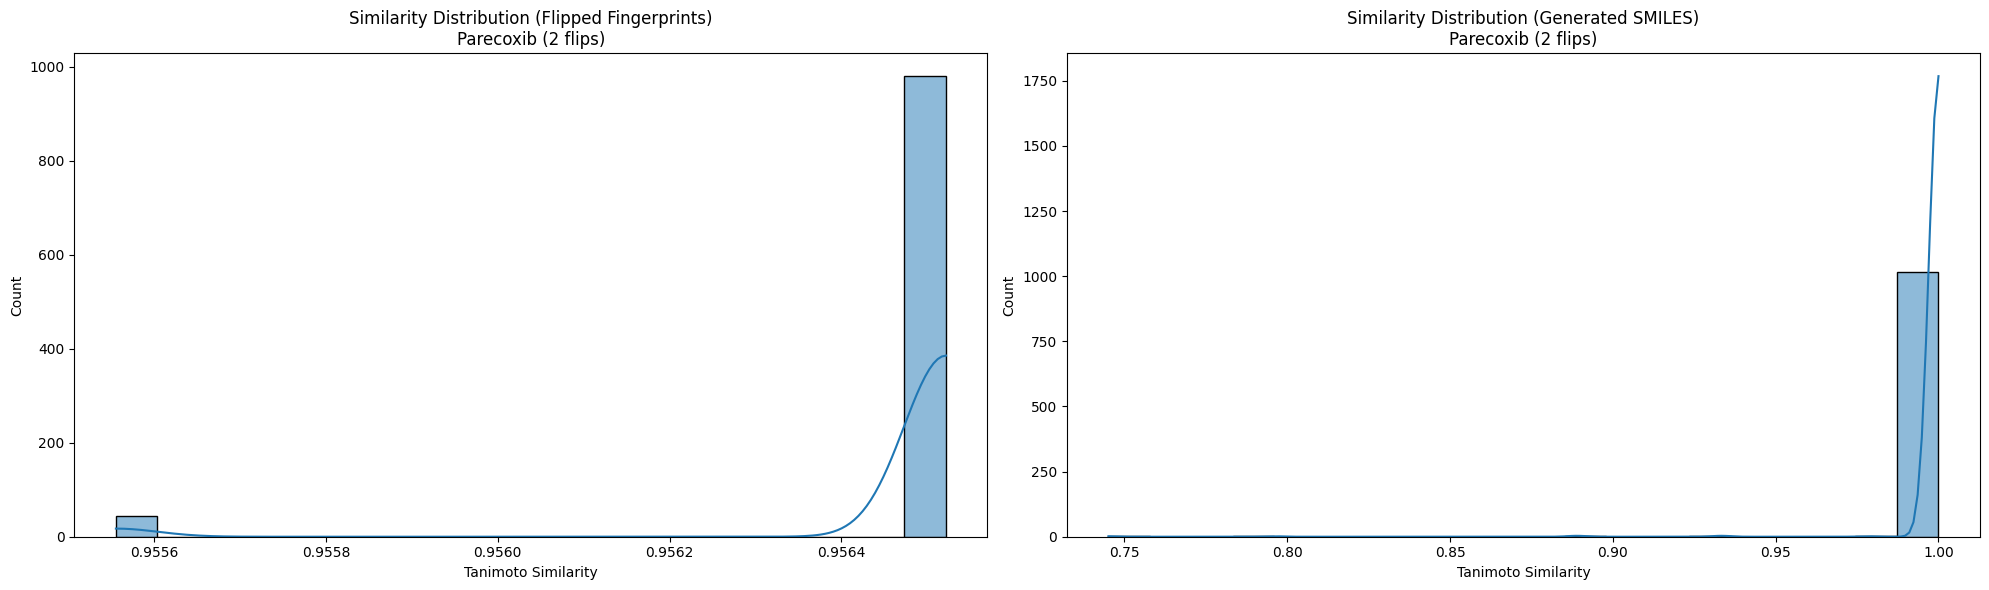

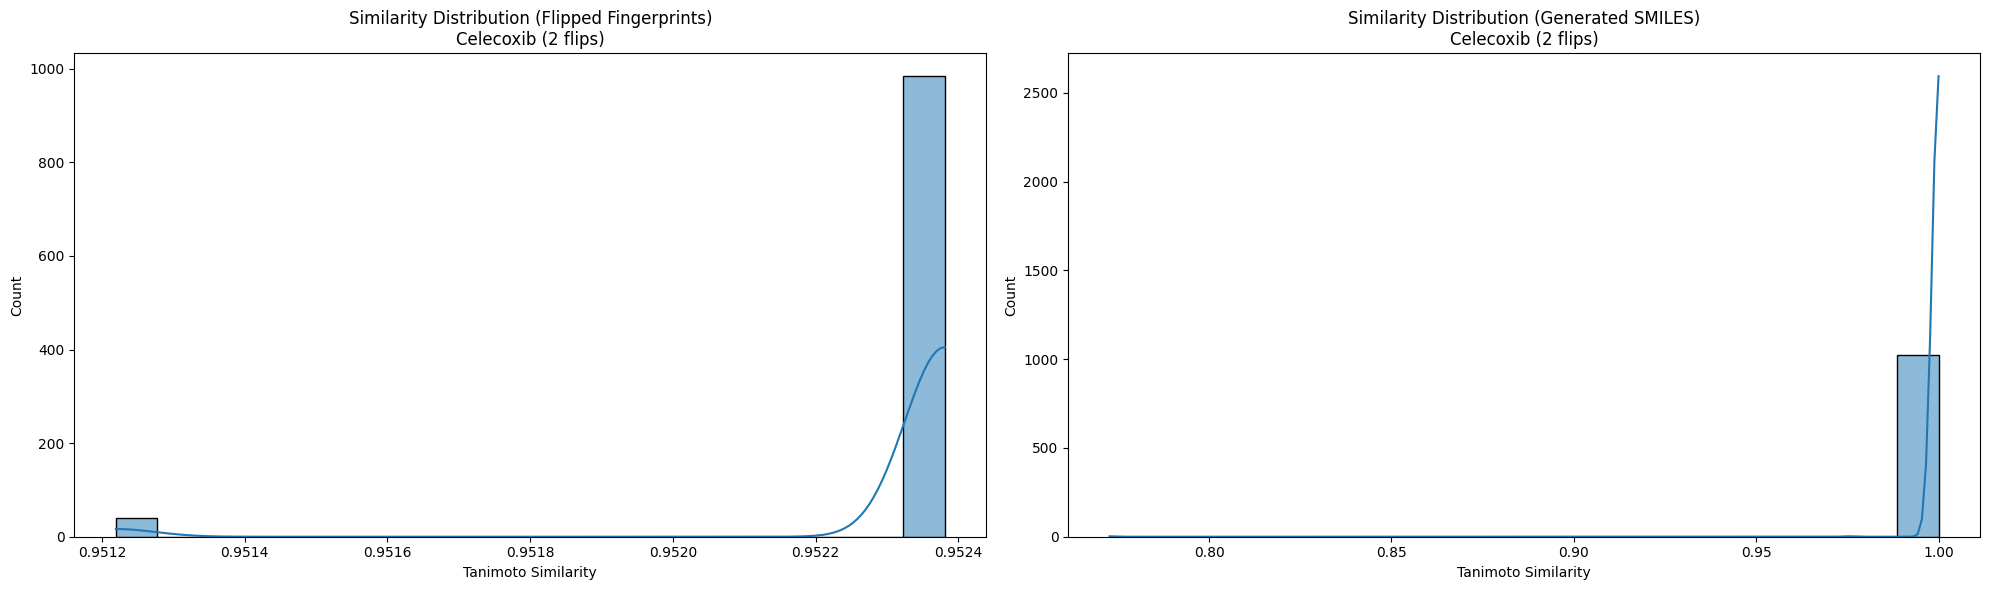

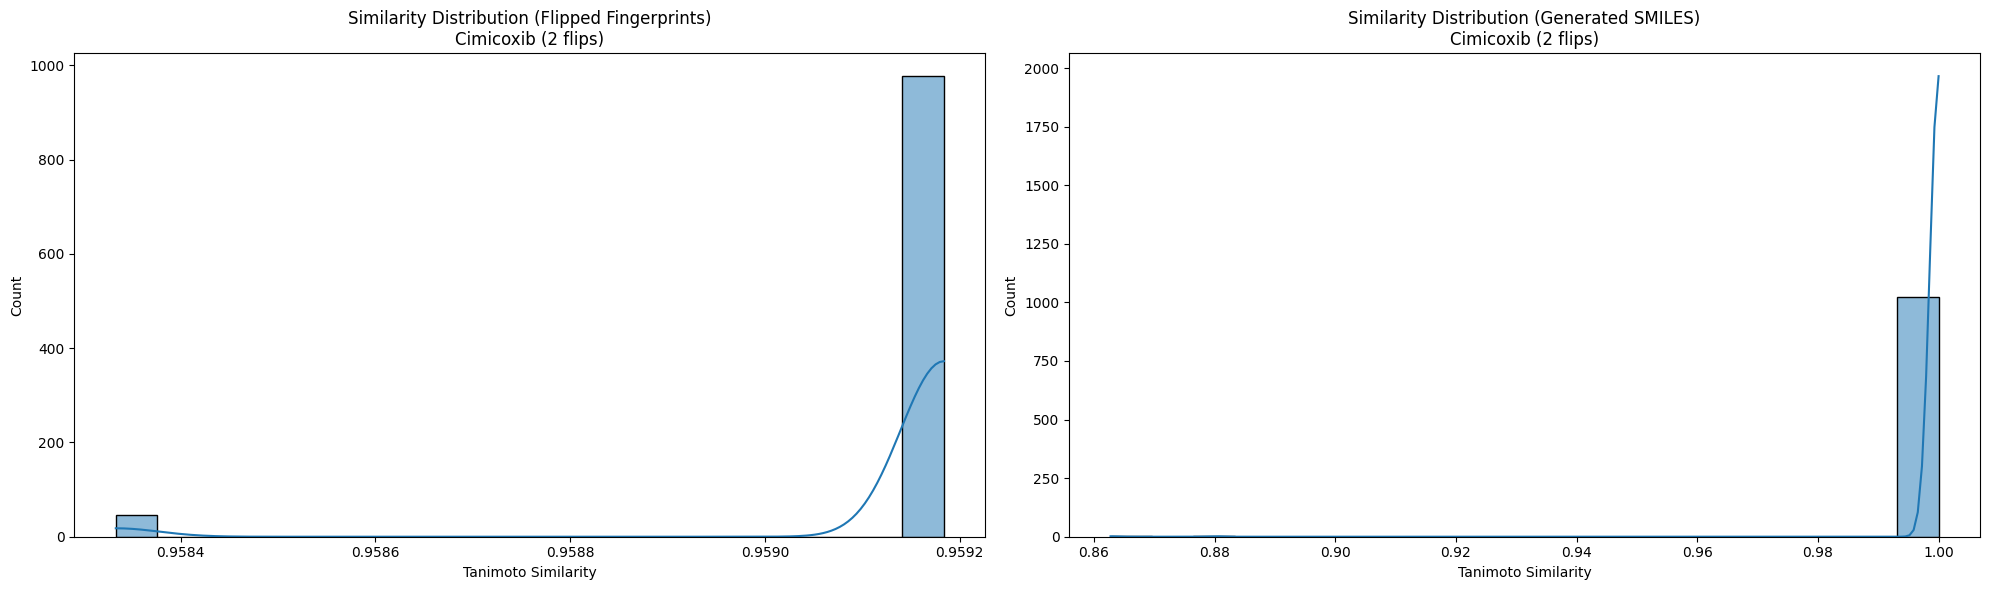

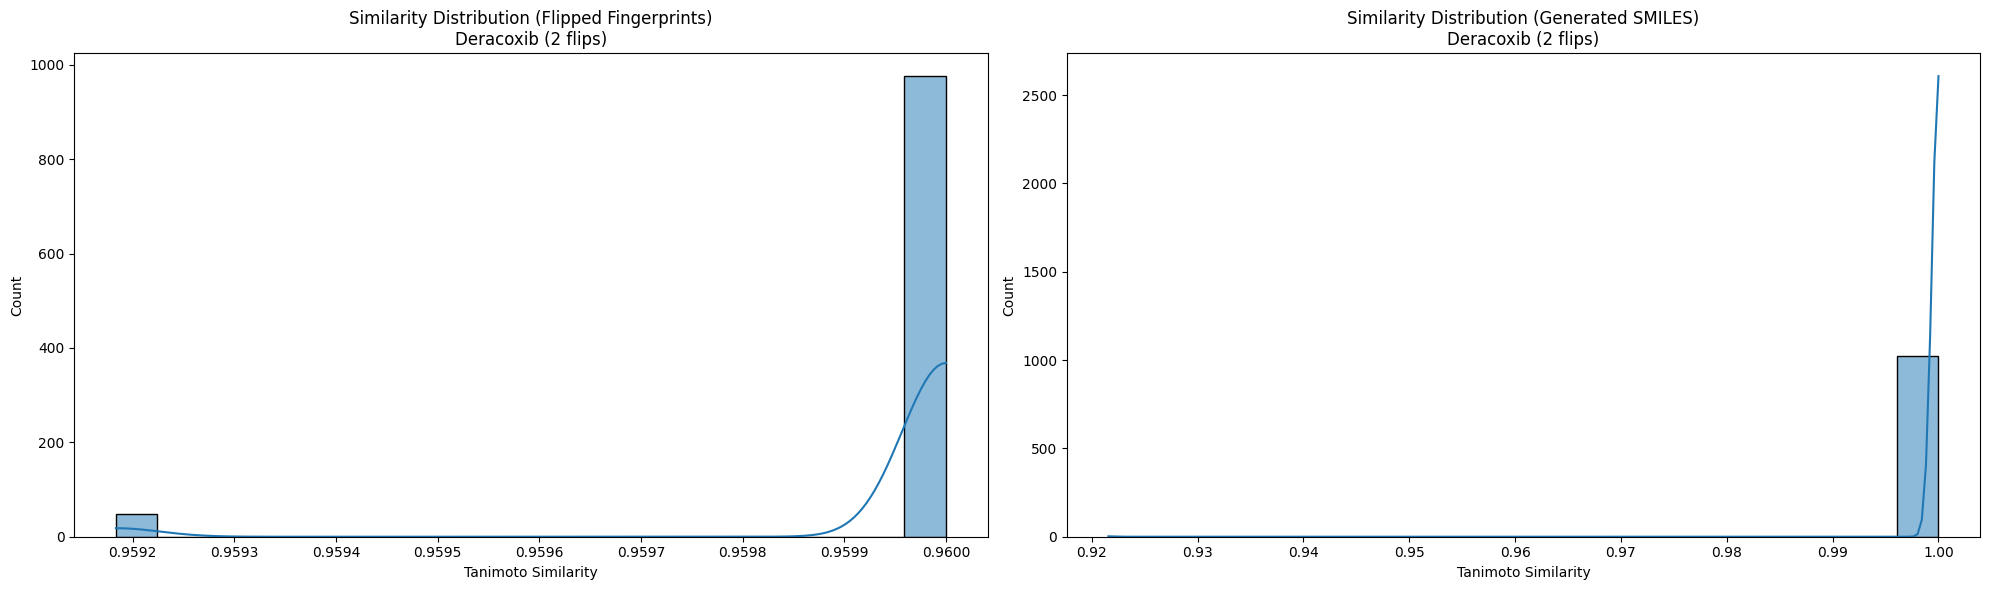

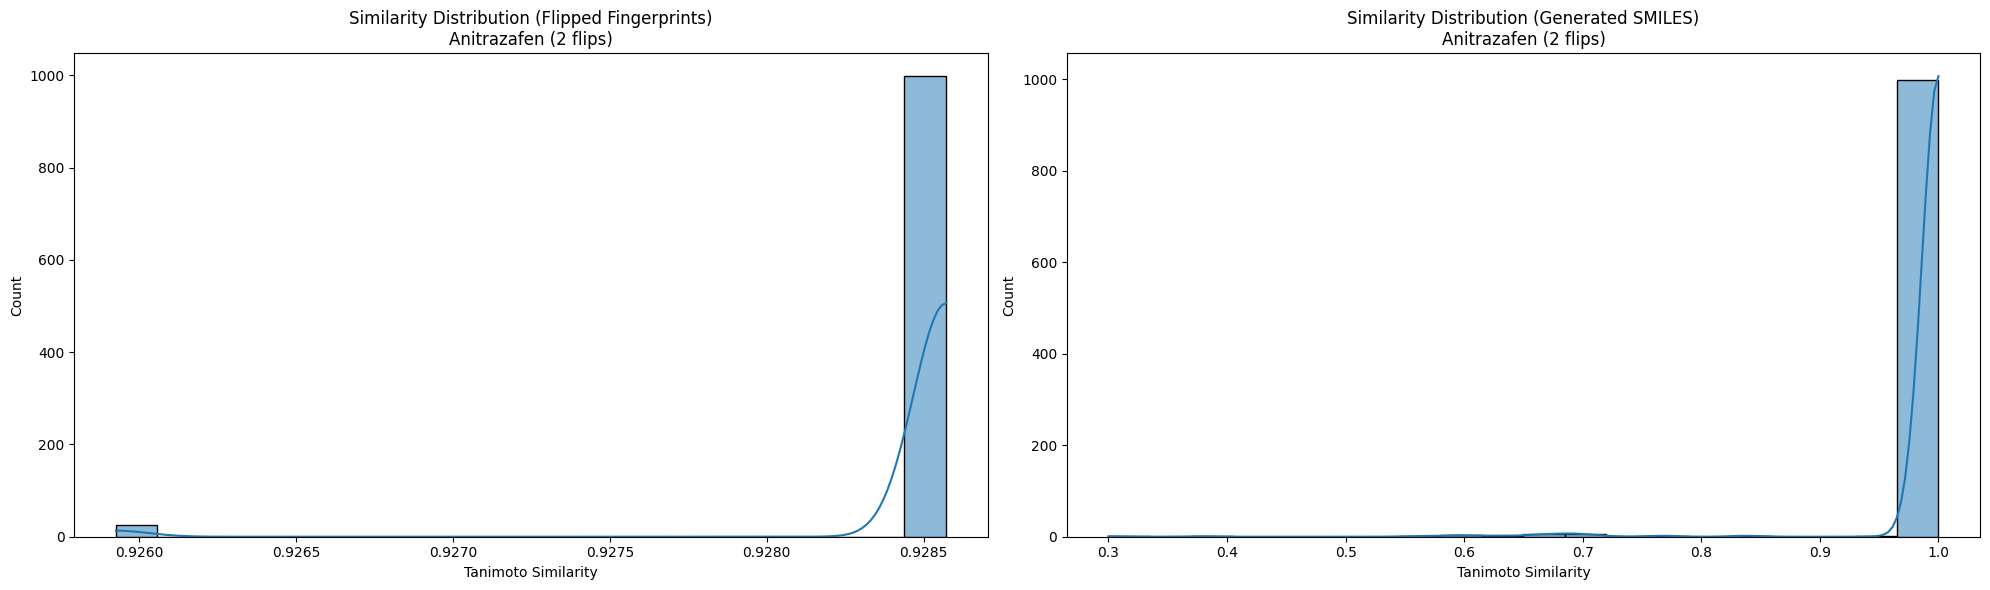

In [27]:
plot_similarity_distribution(parecoxib_df_2, 'Parecoxib', 2)
plot_similarity_distribution(celecoxib_df_2, 'Celecoxib', 2)
plot_similarity_distribution(cimicoxib_df_2, 'Cimicoxib', 2)
plot_similarity_distribution(deracoxib_df_2, 'Deracoxib', 2)
plot_similarity_distribution(anitrazafen_df_2, 'Anitrazafen', 2)

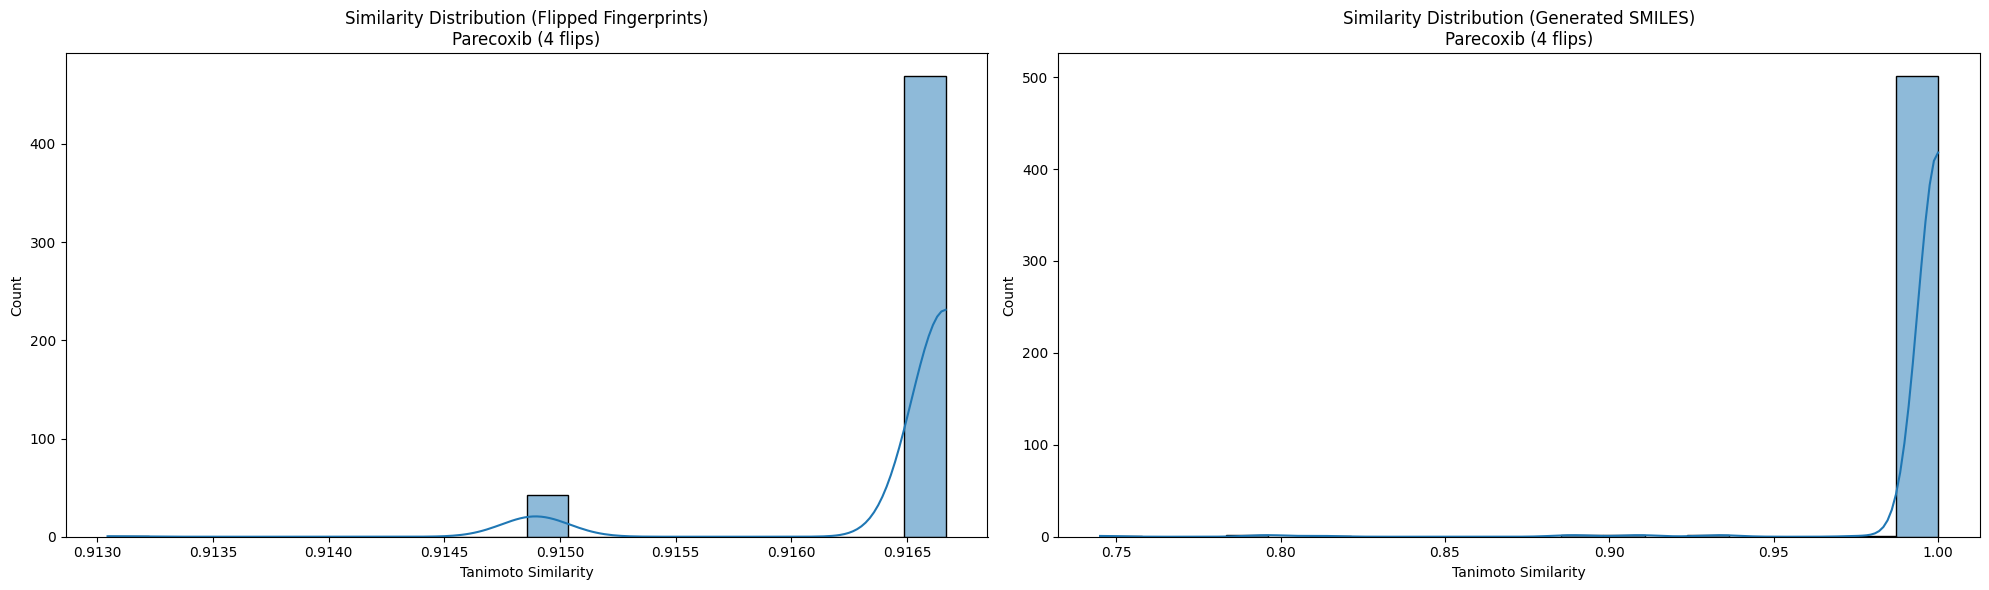

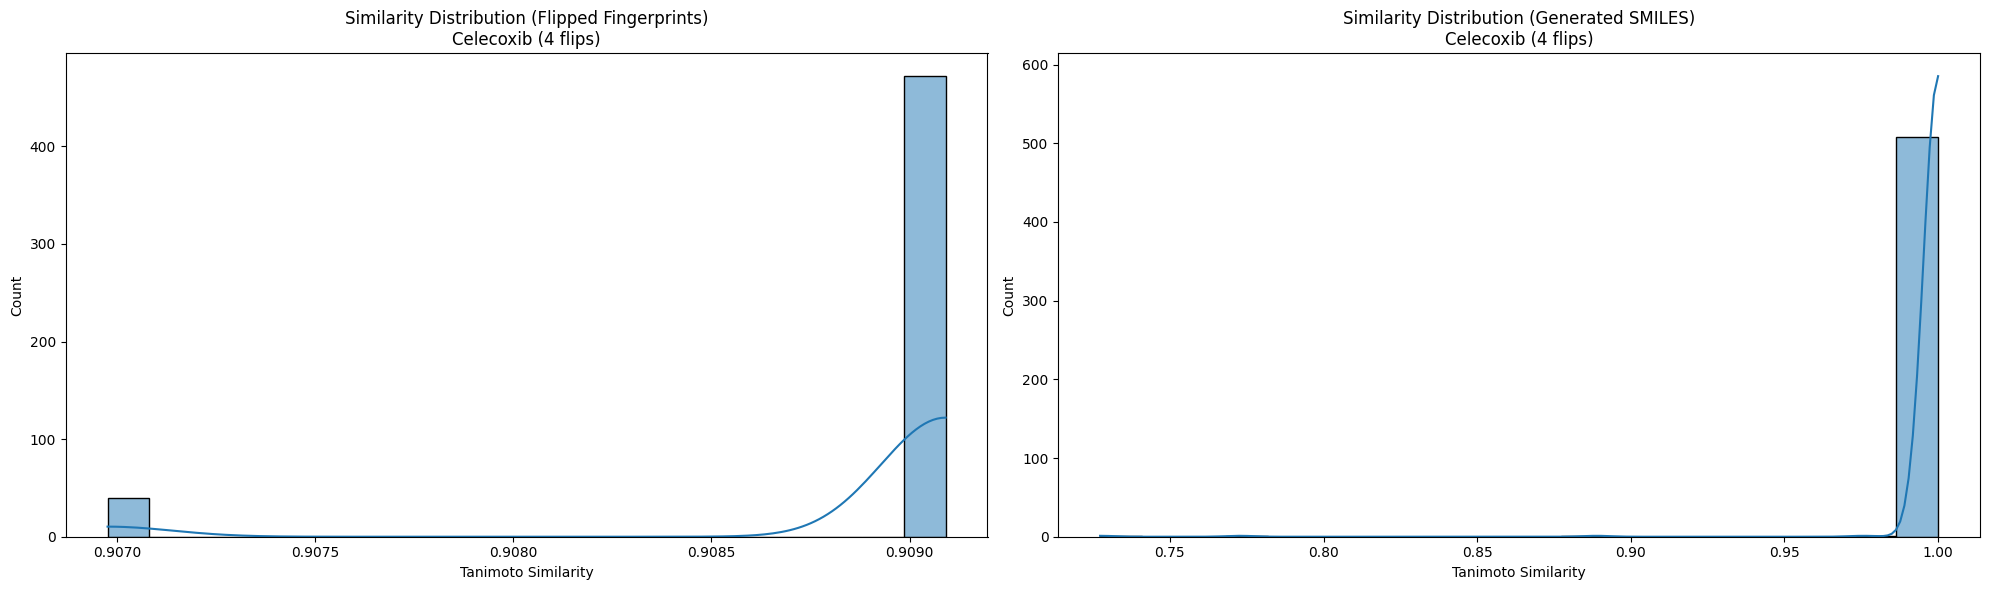

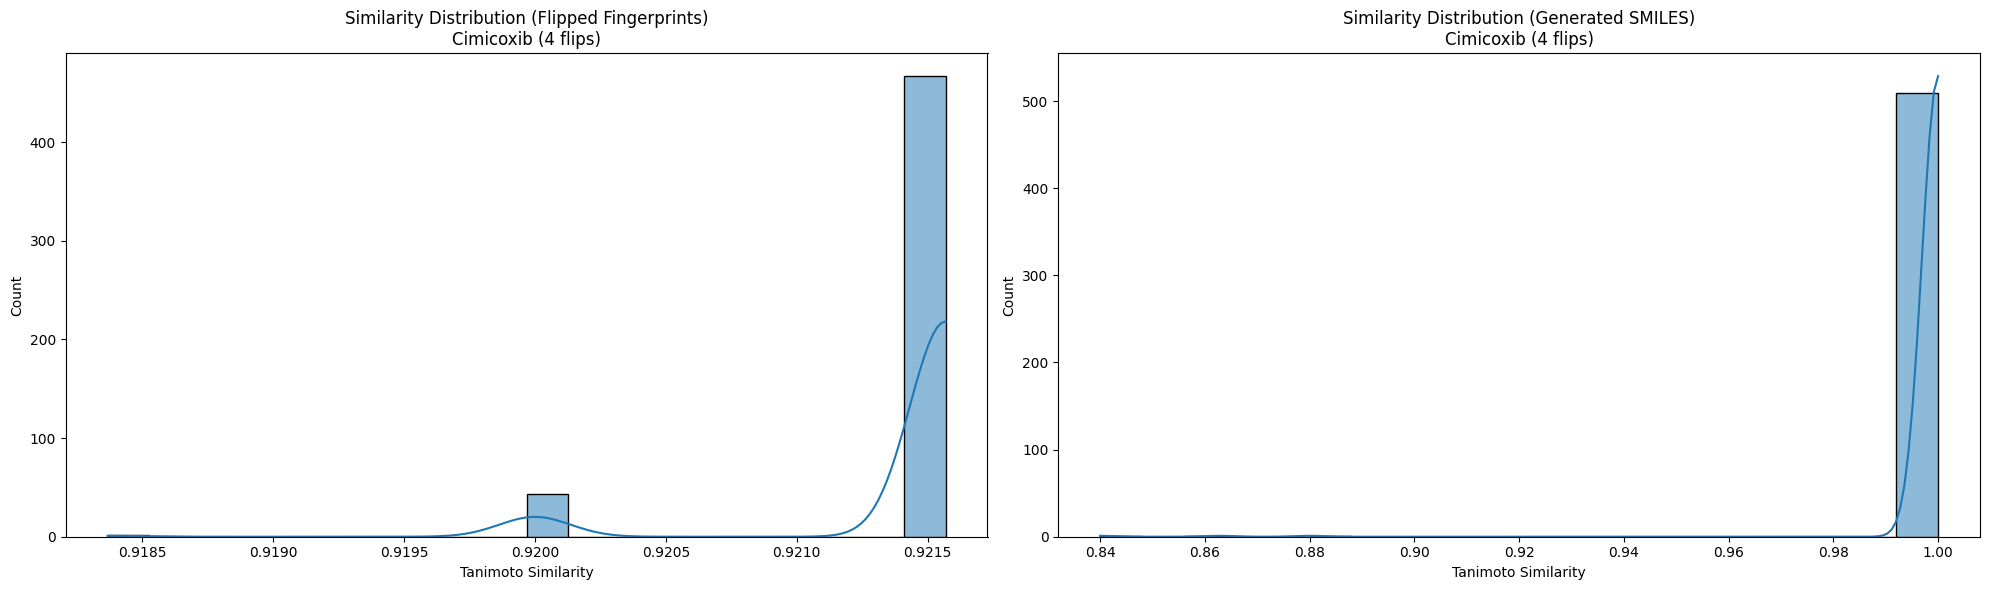

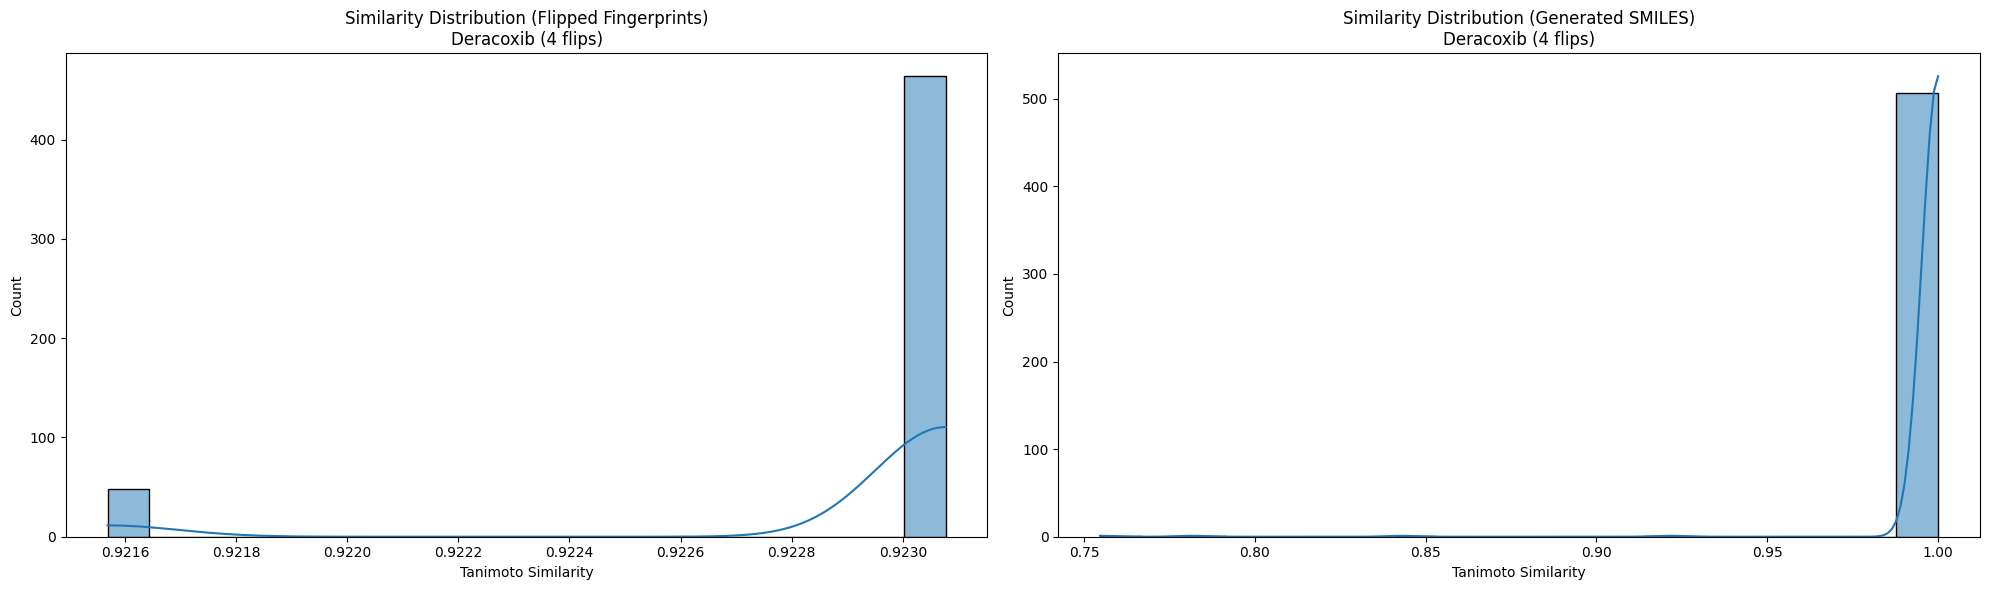

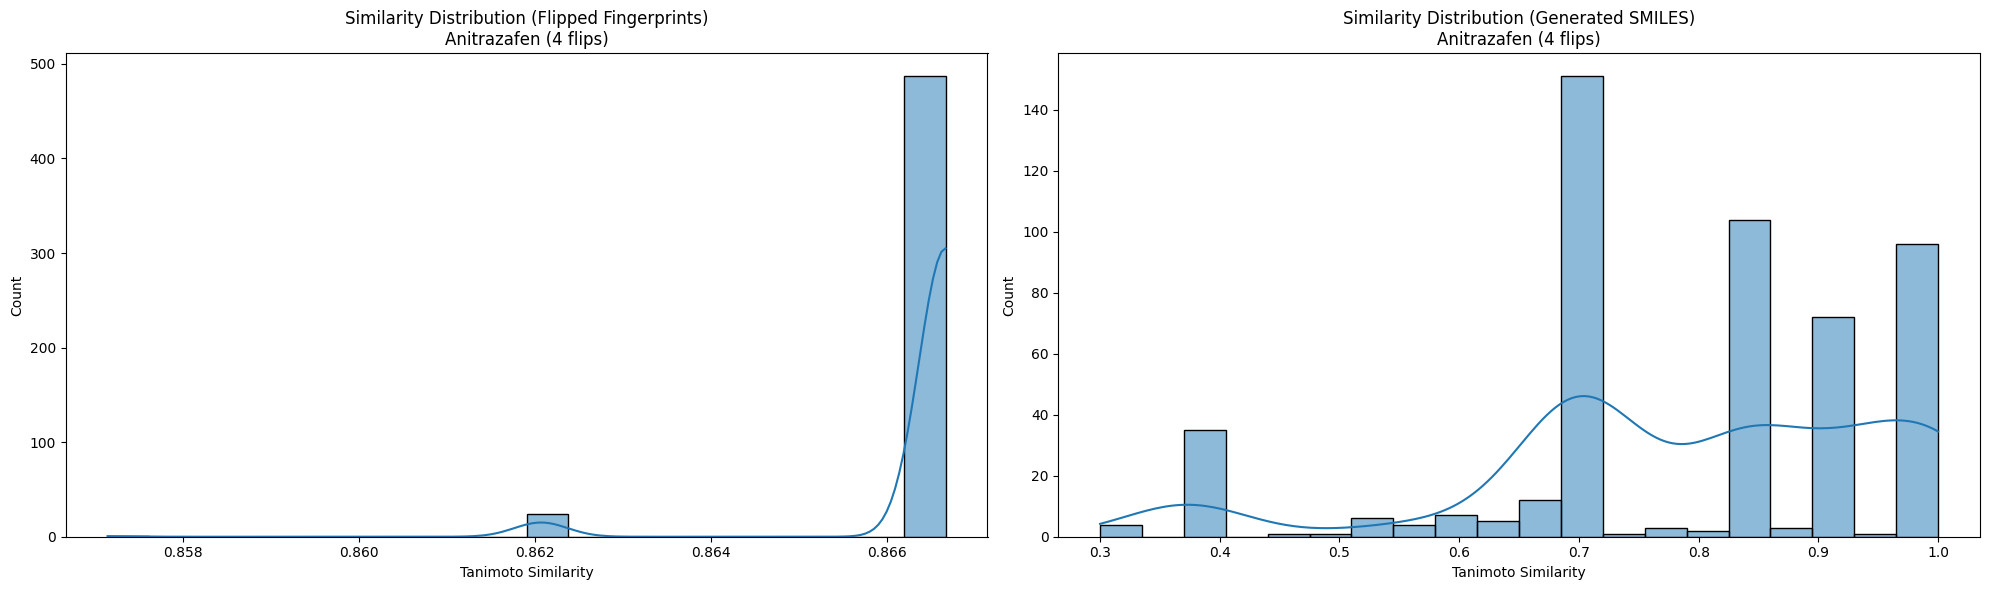

In [28]:
plot_similarity_distribution(parecoxib_df_4, 'Parecoxib', 4)
plot_similarity_distribution(celecoxib_df_4, 'Celecoxib', 4)
plot_similarity_distribution(cimicoxib_df_4, 'Cimicoxib', 4)
plot_similarity_distribution(deracoxib_df_4, 'Deracoxib', 4)
plot_similarity_distribution(anitrazafen_df_4, 'Anitrazafen', 4)

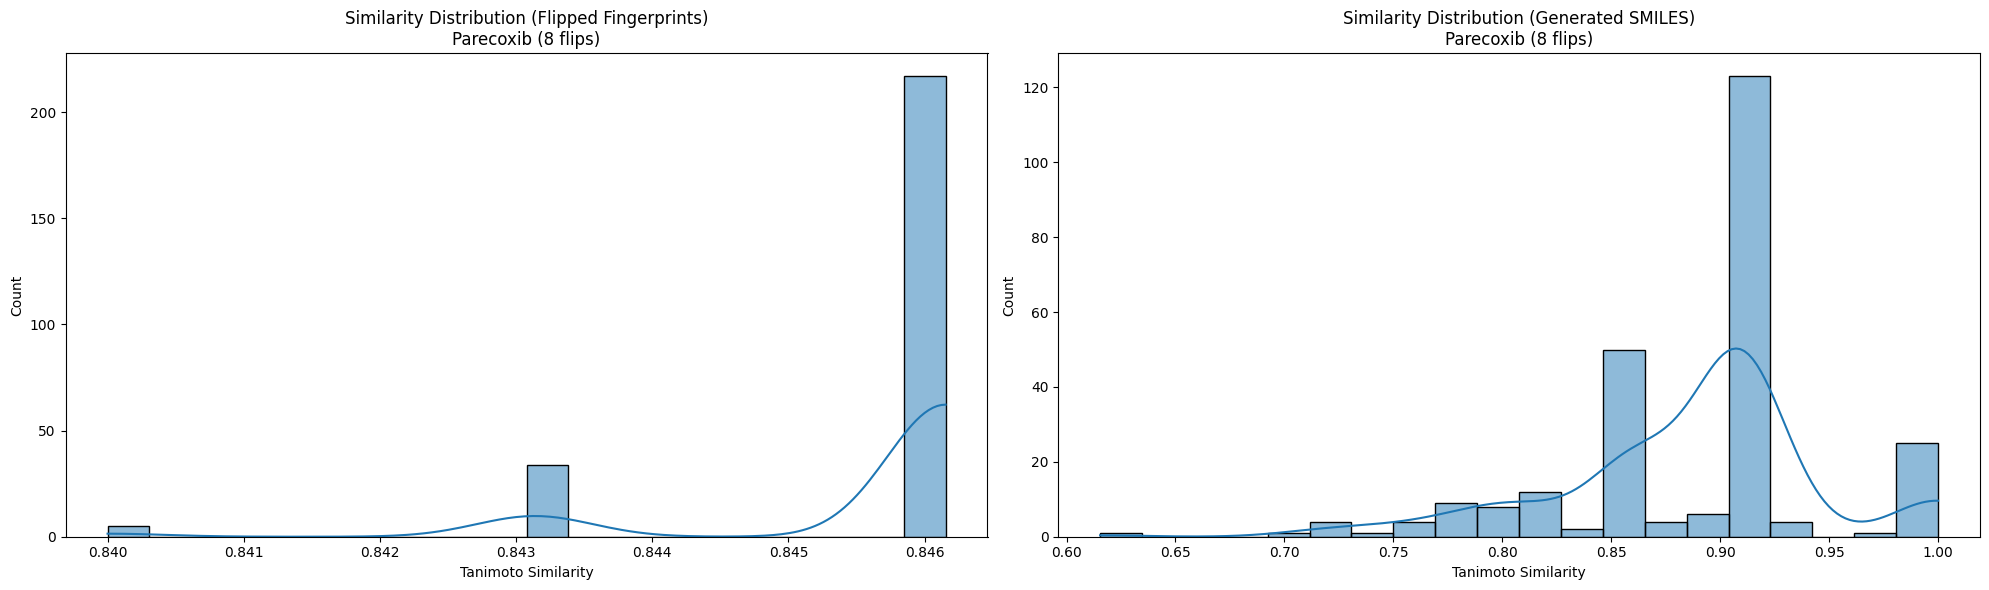

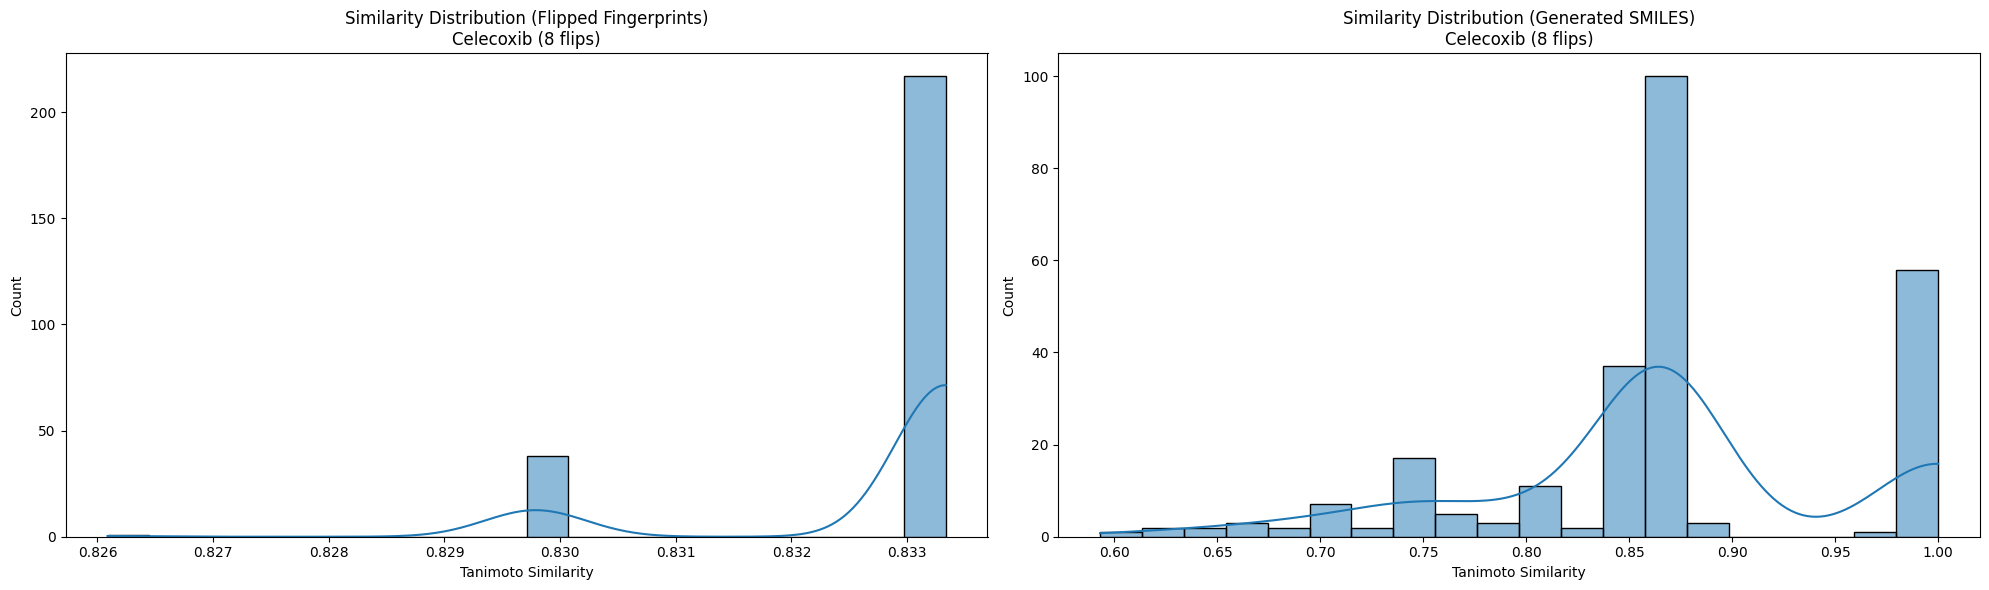

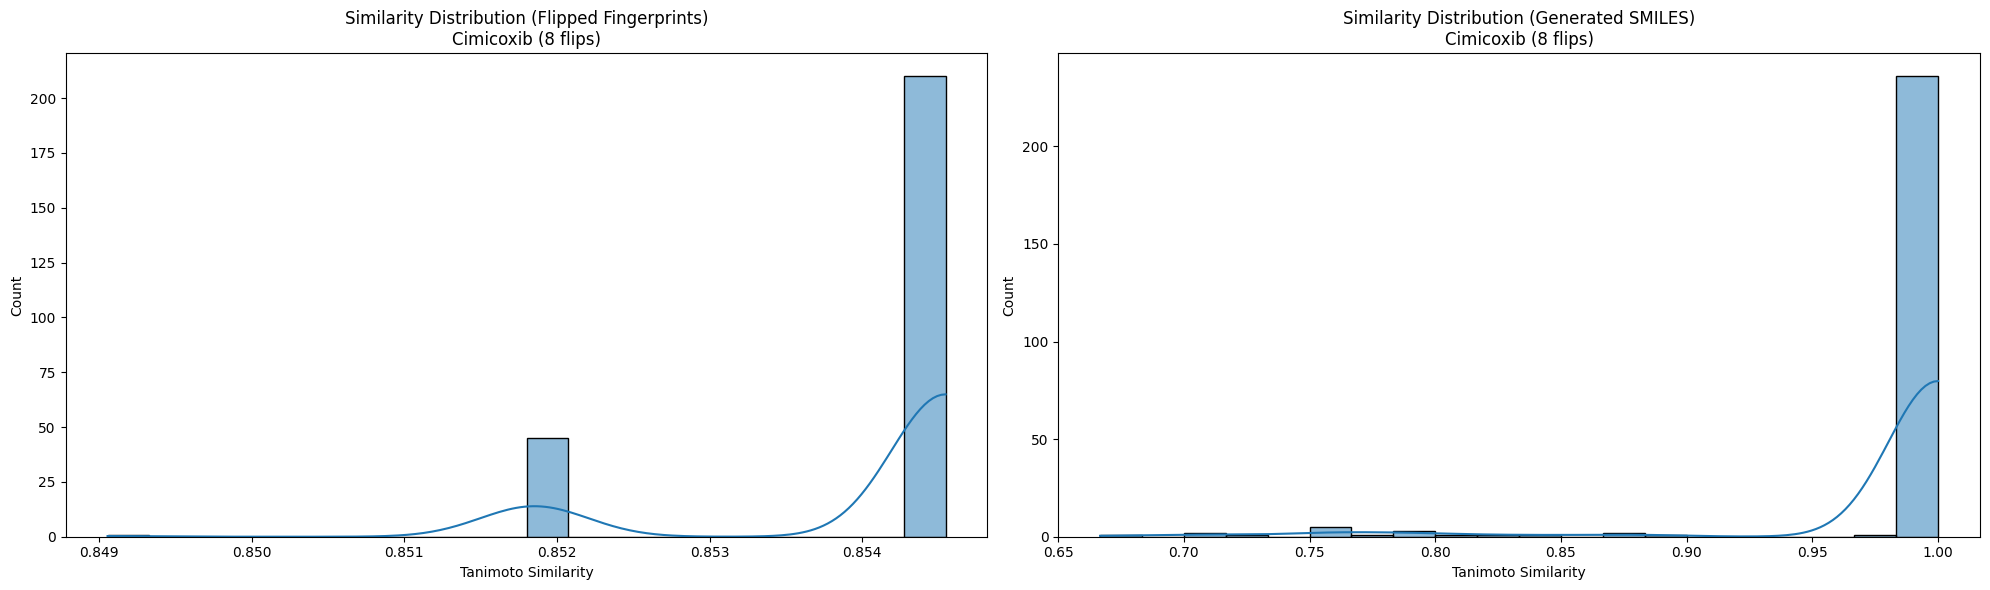

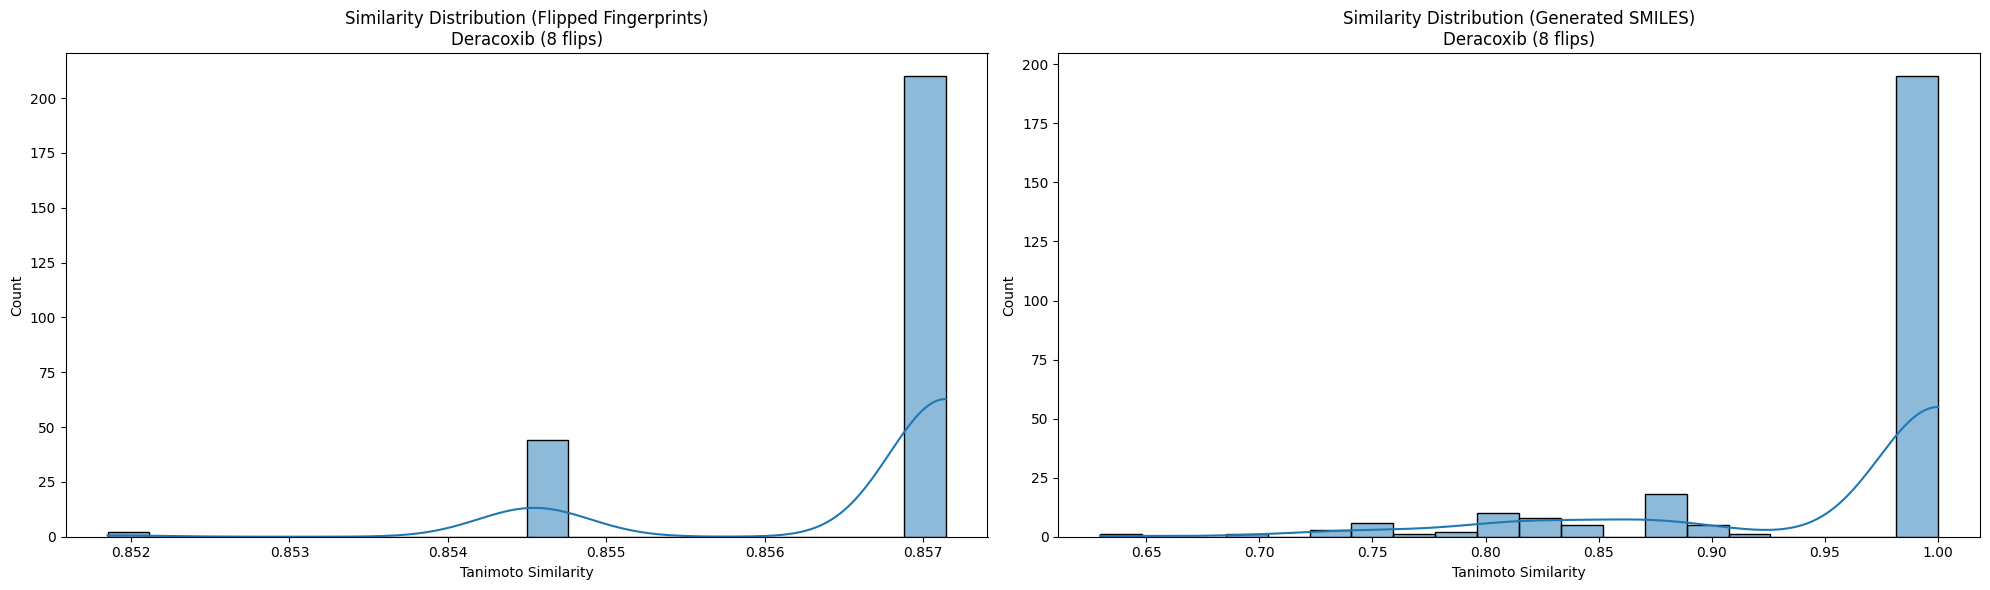

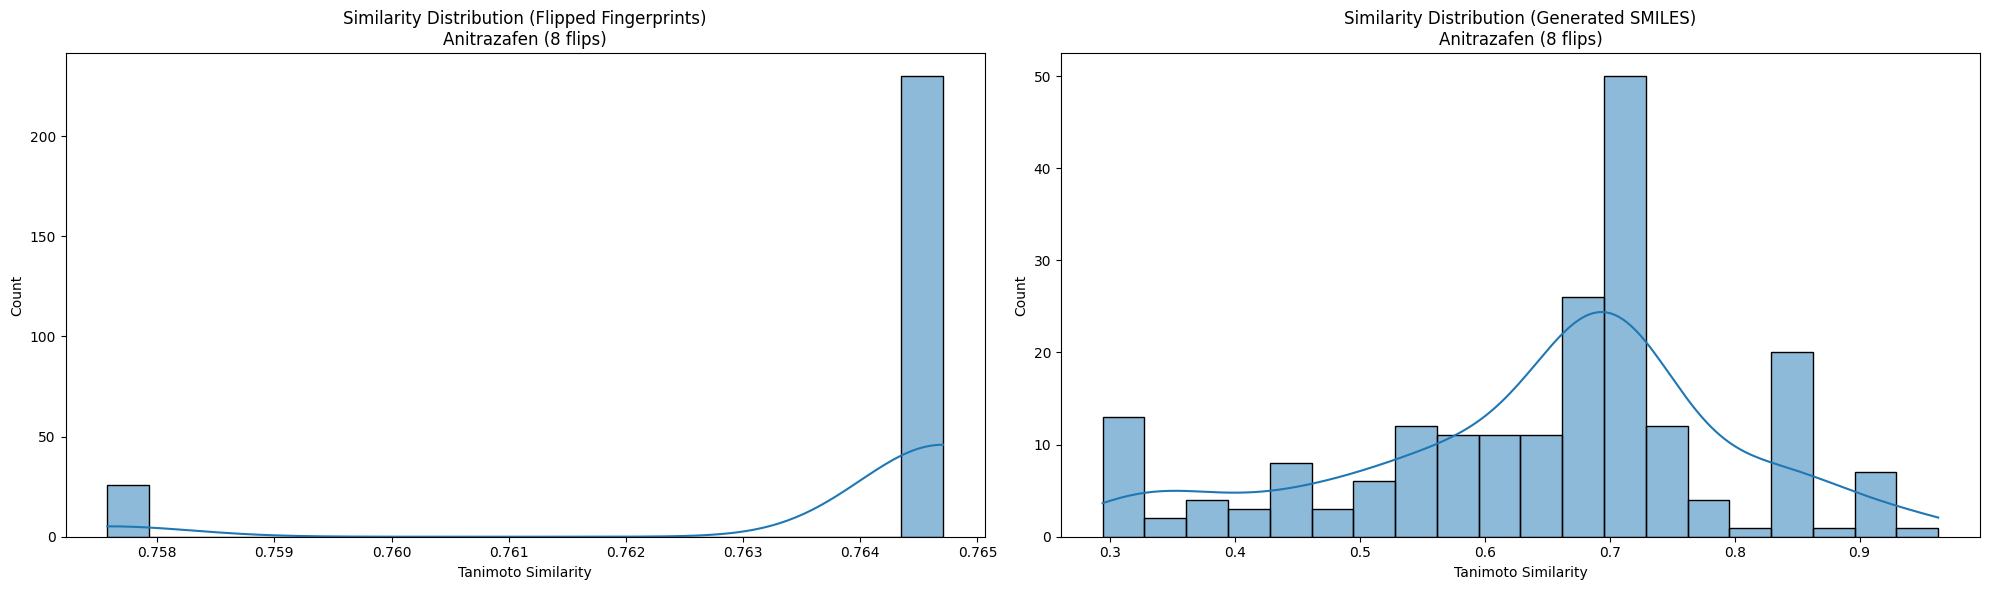

In [29]:
plot_similarity_distribution(parecoxib_df_8, 'Parecoxib', 8)
plot_similarity_distribution(celecoxib_df_8, 'Celecoxib', 8)
plot_similarity_distribution(cimicoxib_df_8, 'Cimicoxib', 8)
plot_similarity_distribution(deracoxib_df_8, 'Deracoxib', 8)
plot_similarity_distribution(anitrazafen_df_8, 'Anitrazafen', 8)

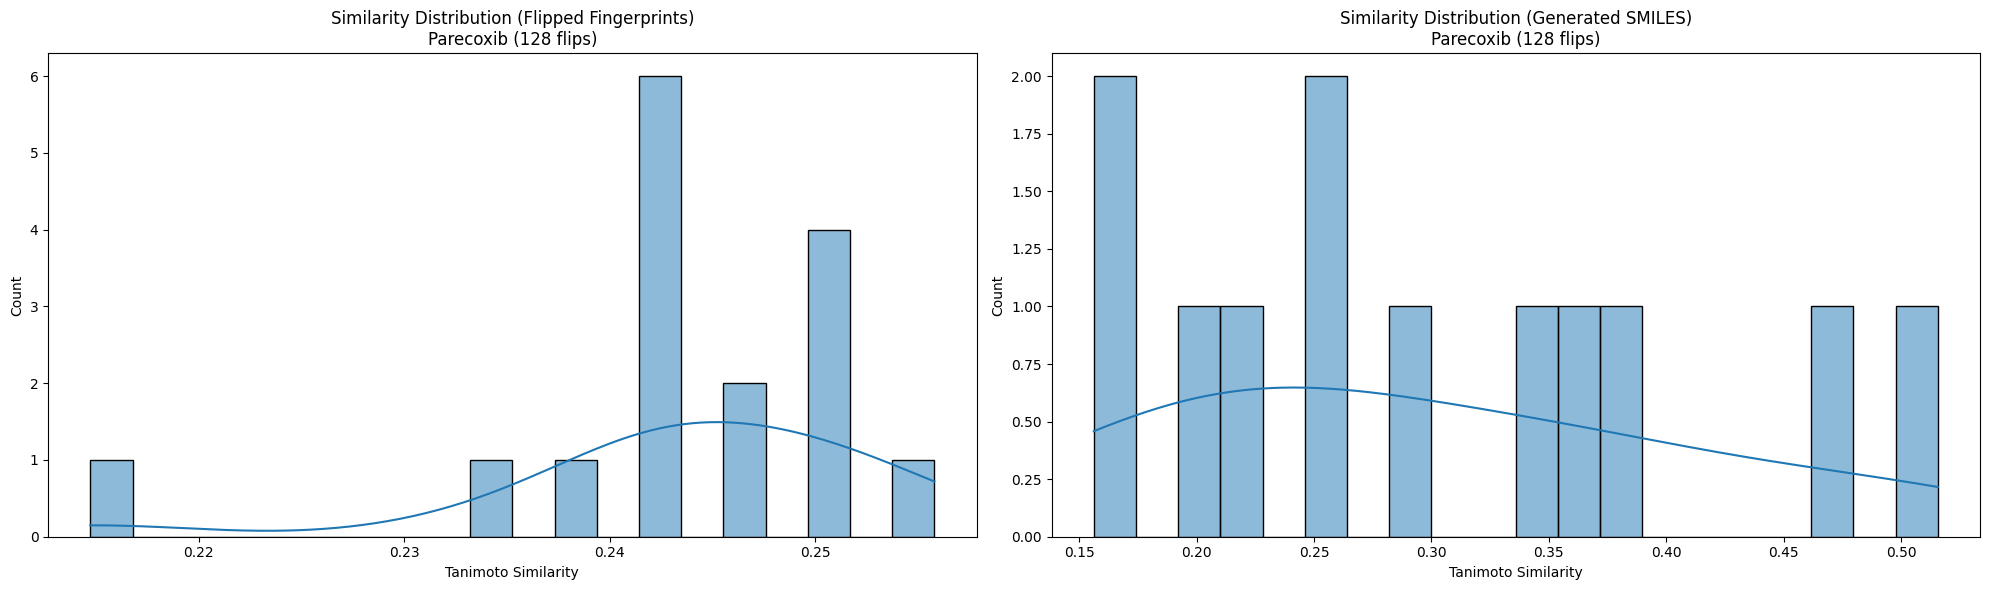

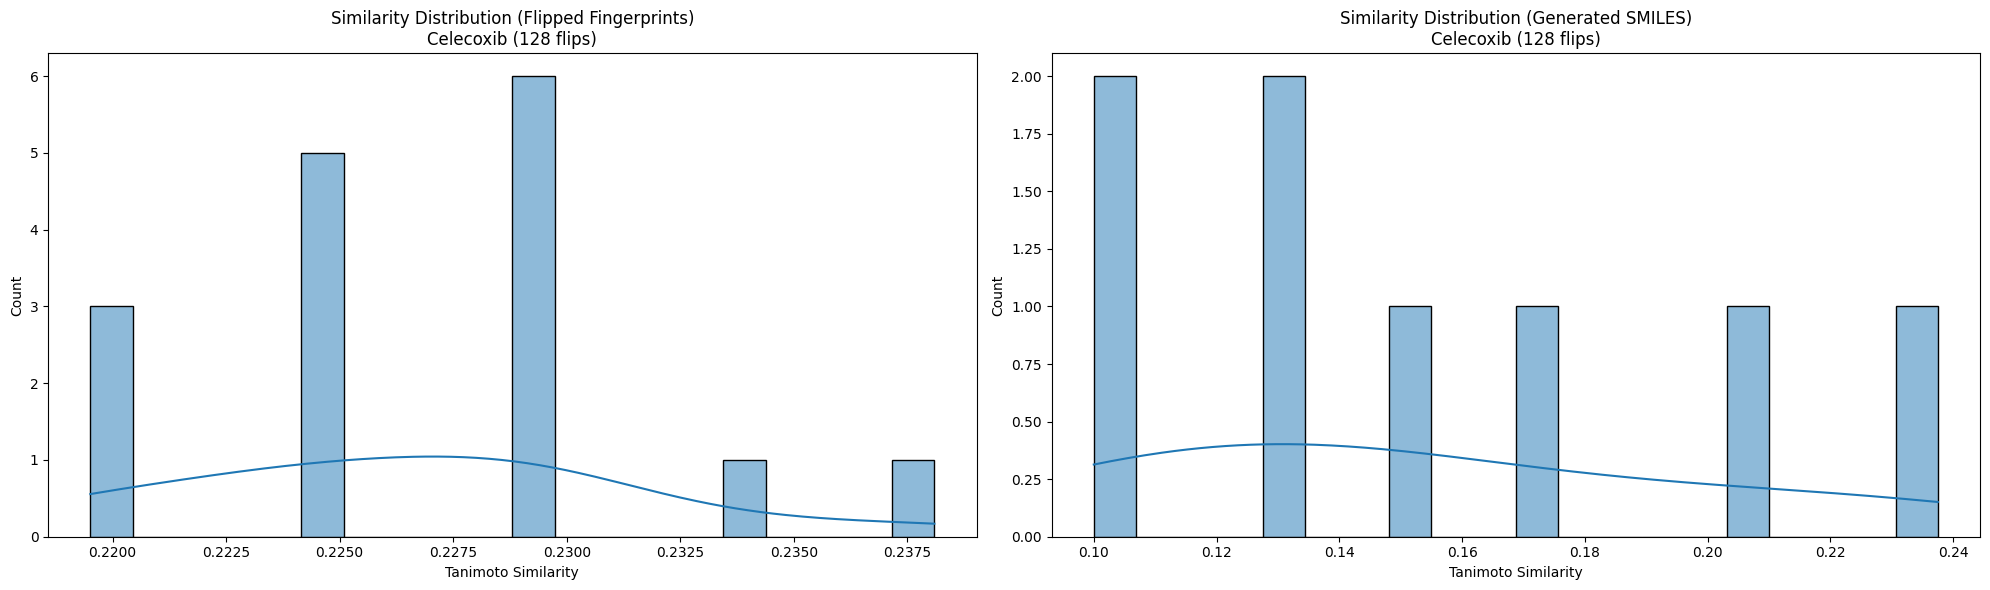

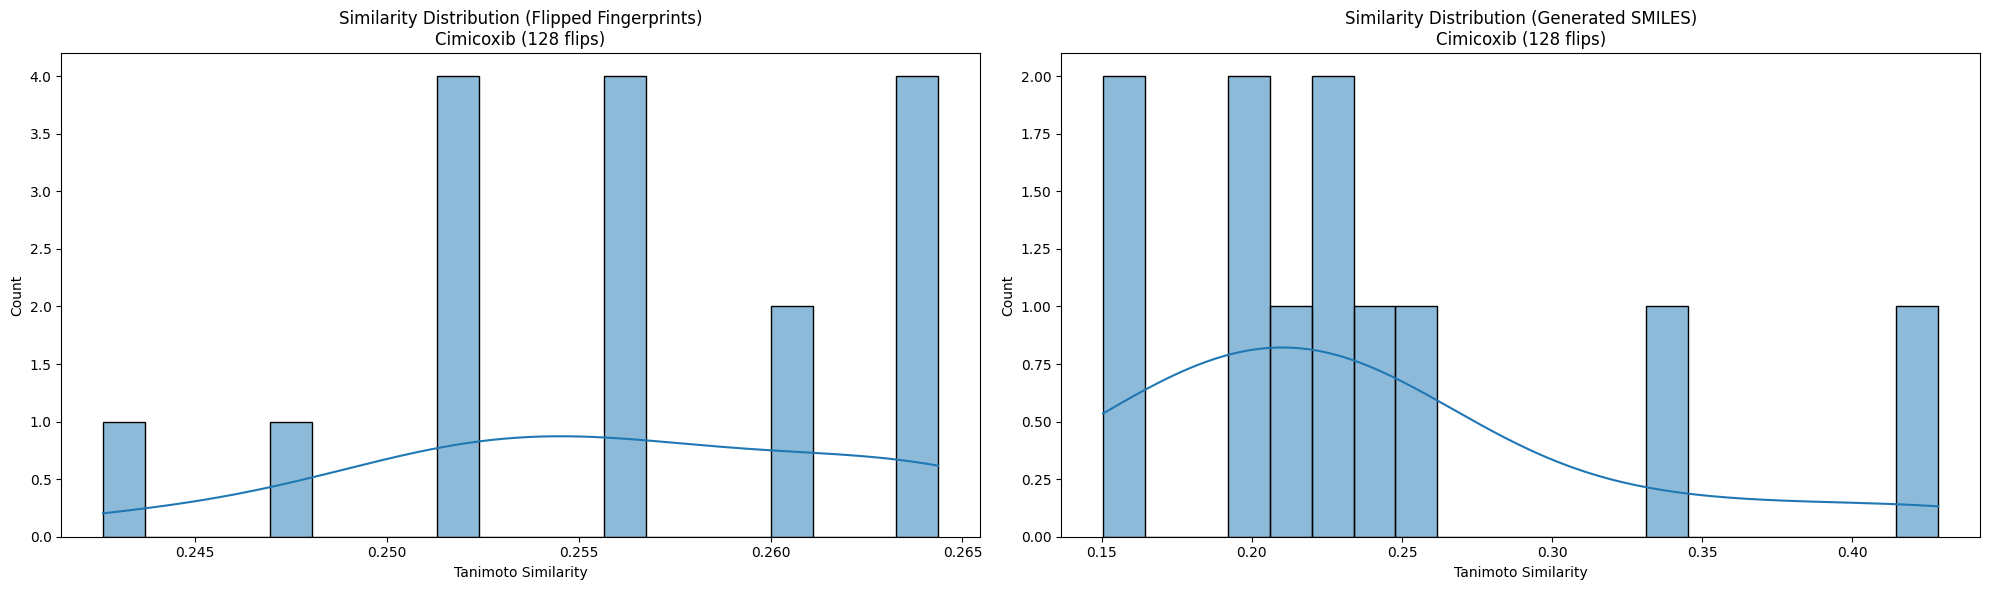

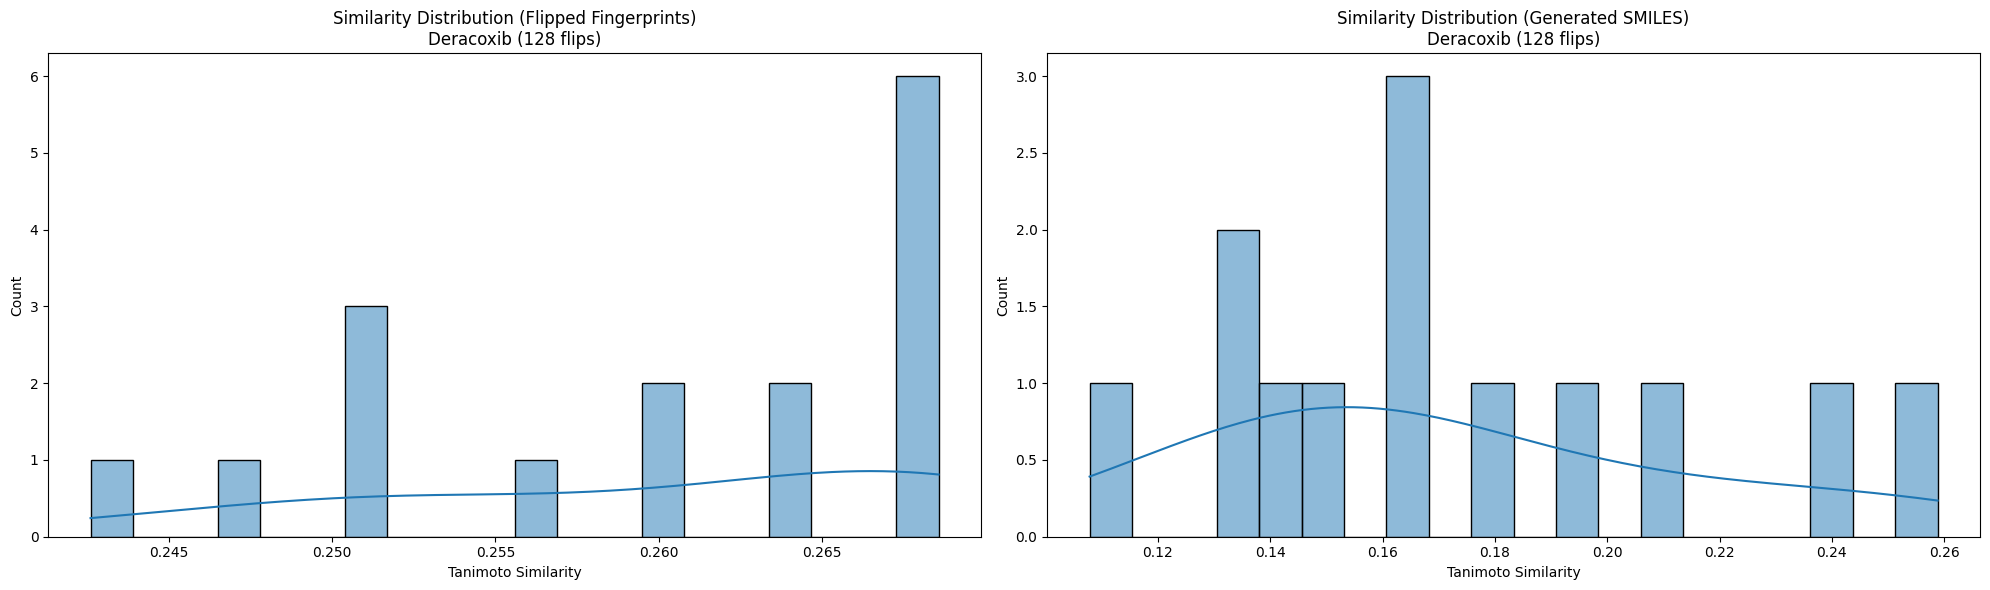

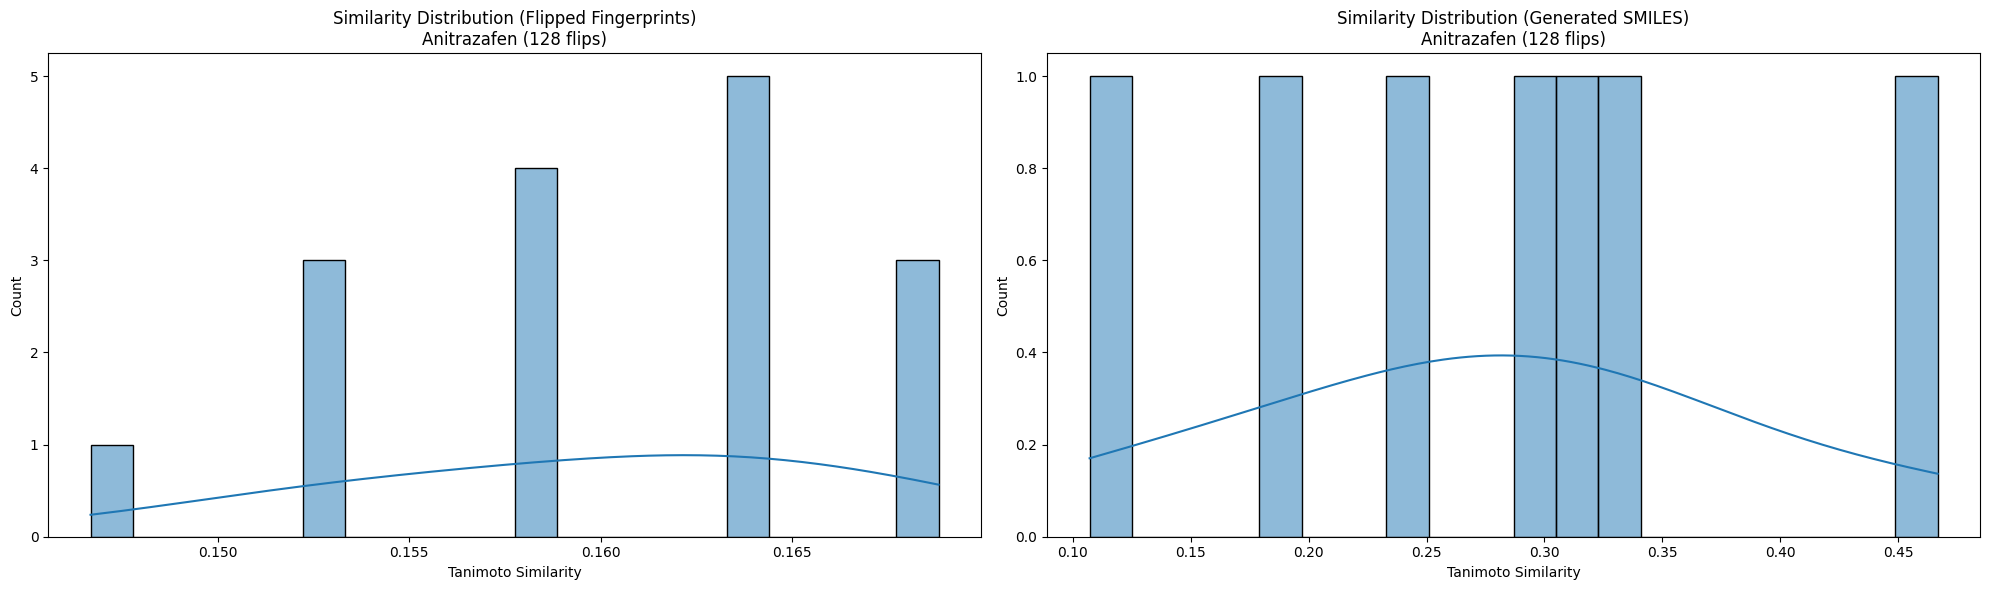

In [30]:
plot_similarity_distribution(parecoxib_df_128, 'Parecoxib', 128)
plot_similarity_distribution(celecoxib_df_128, 'Celecoxib', 128)
plot_similarity_distribution(cimicoxib_df_128, 'Cimicoxib', 128)
plot_similarity_distribution(deracoxib_df_128, 'Deracoxib', 128)
plot_similarity_distribution(anitrazafen_df_128, 'Anitrazafen', 128)

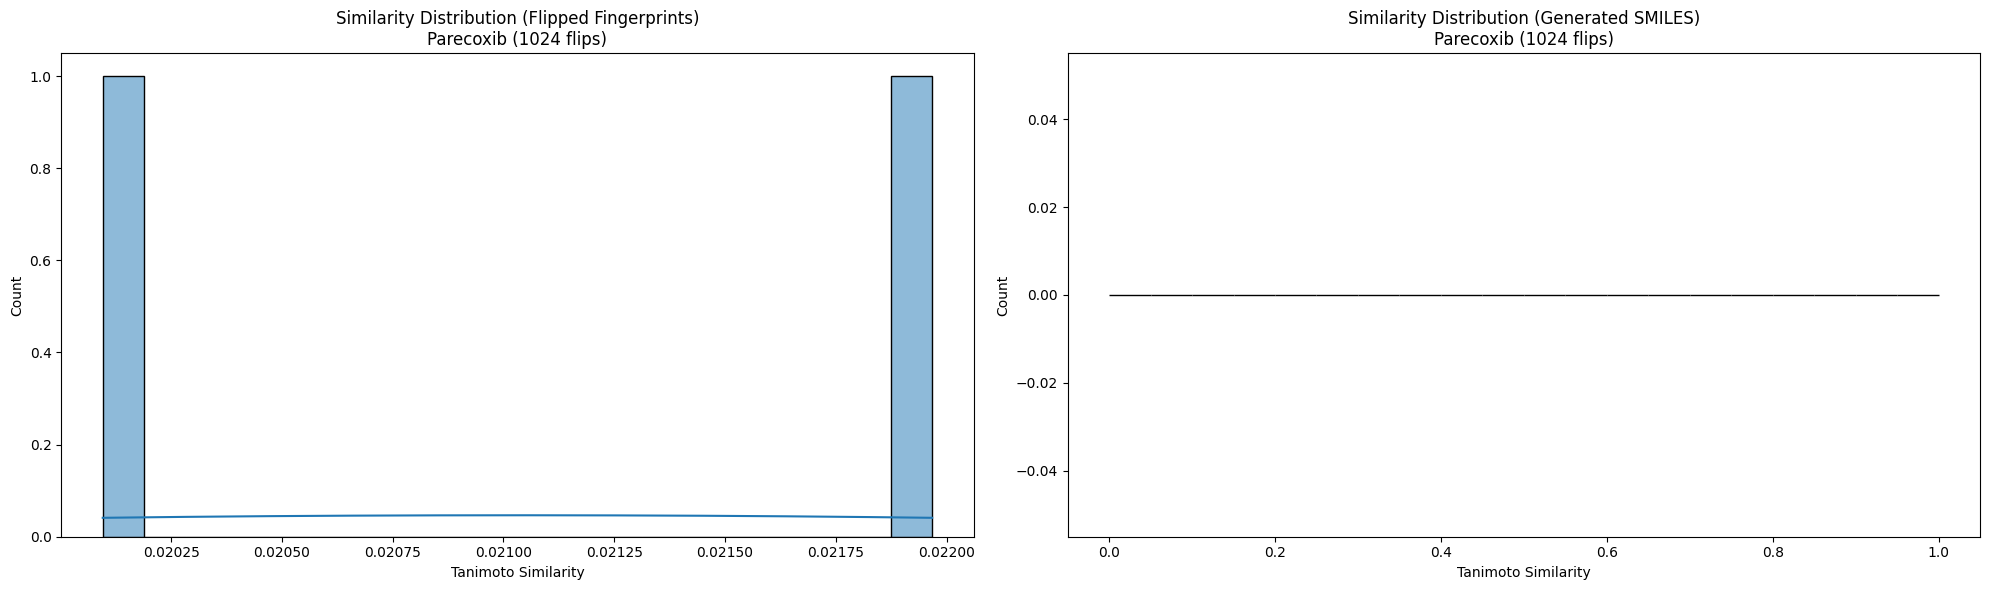

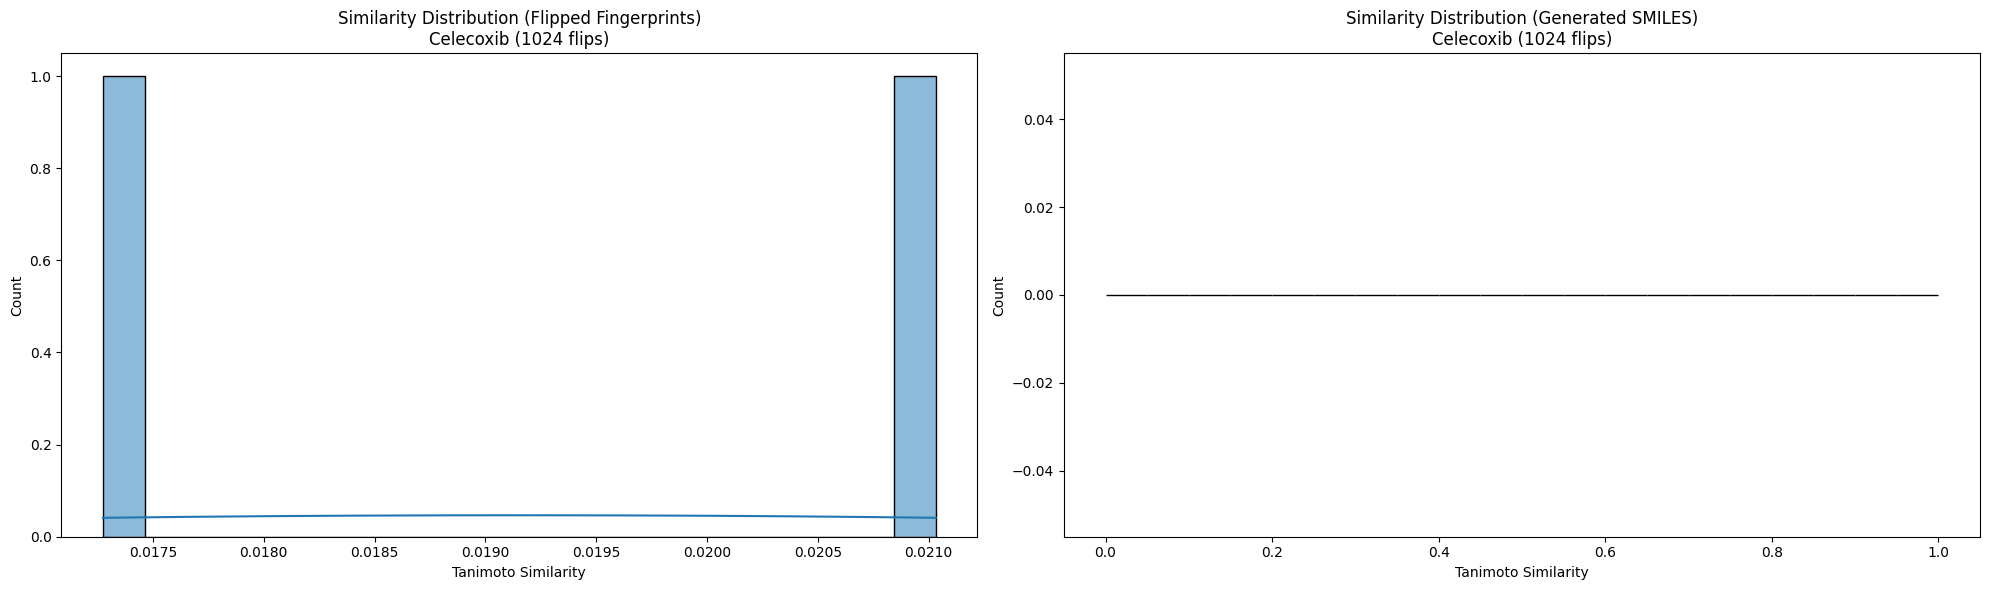

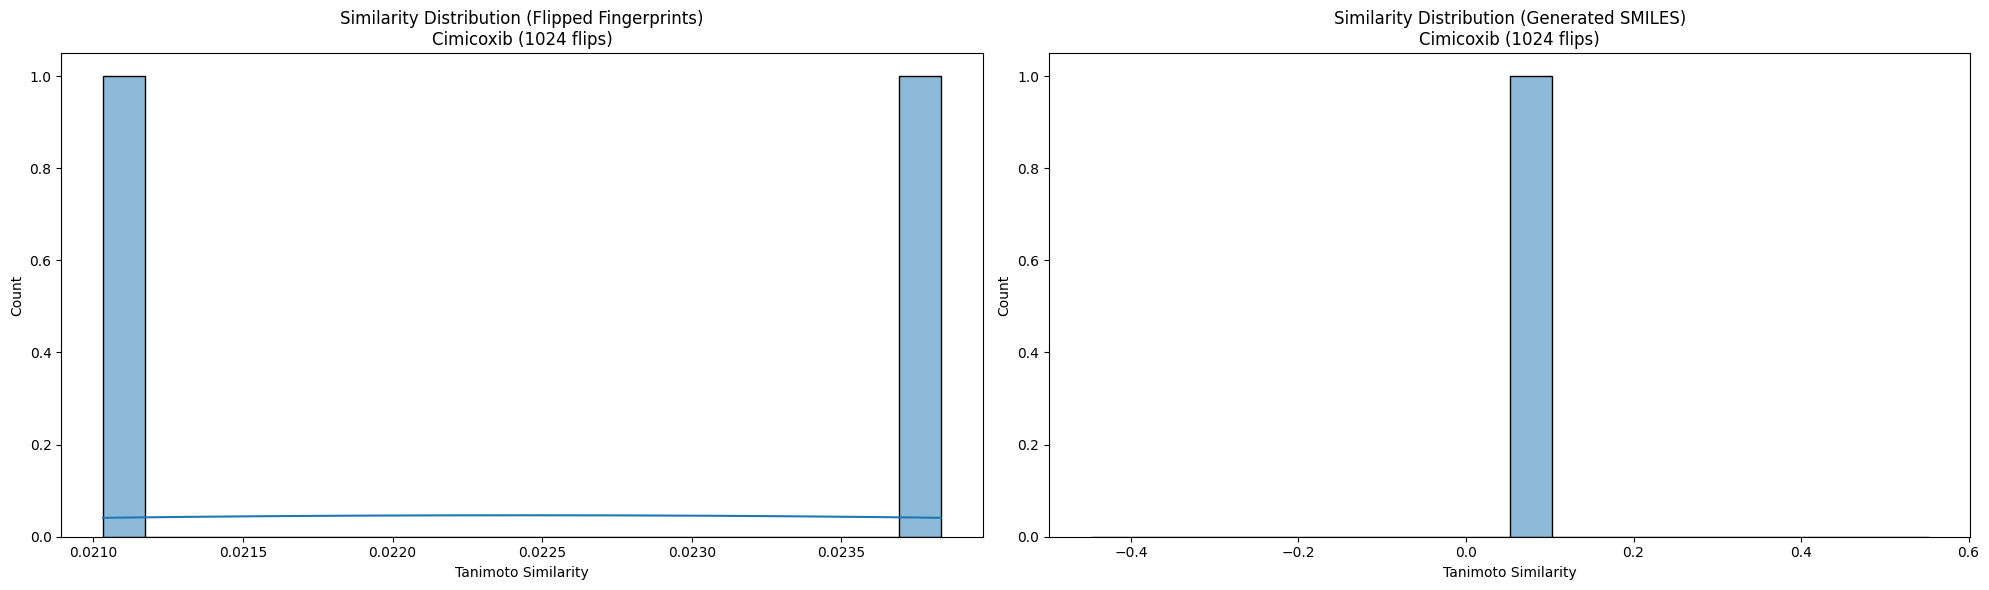

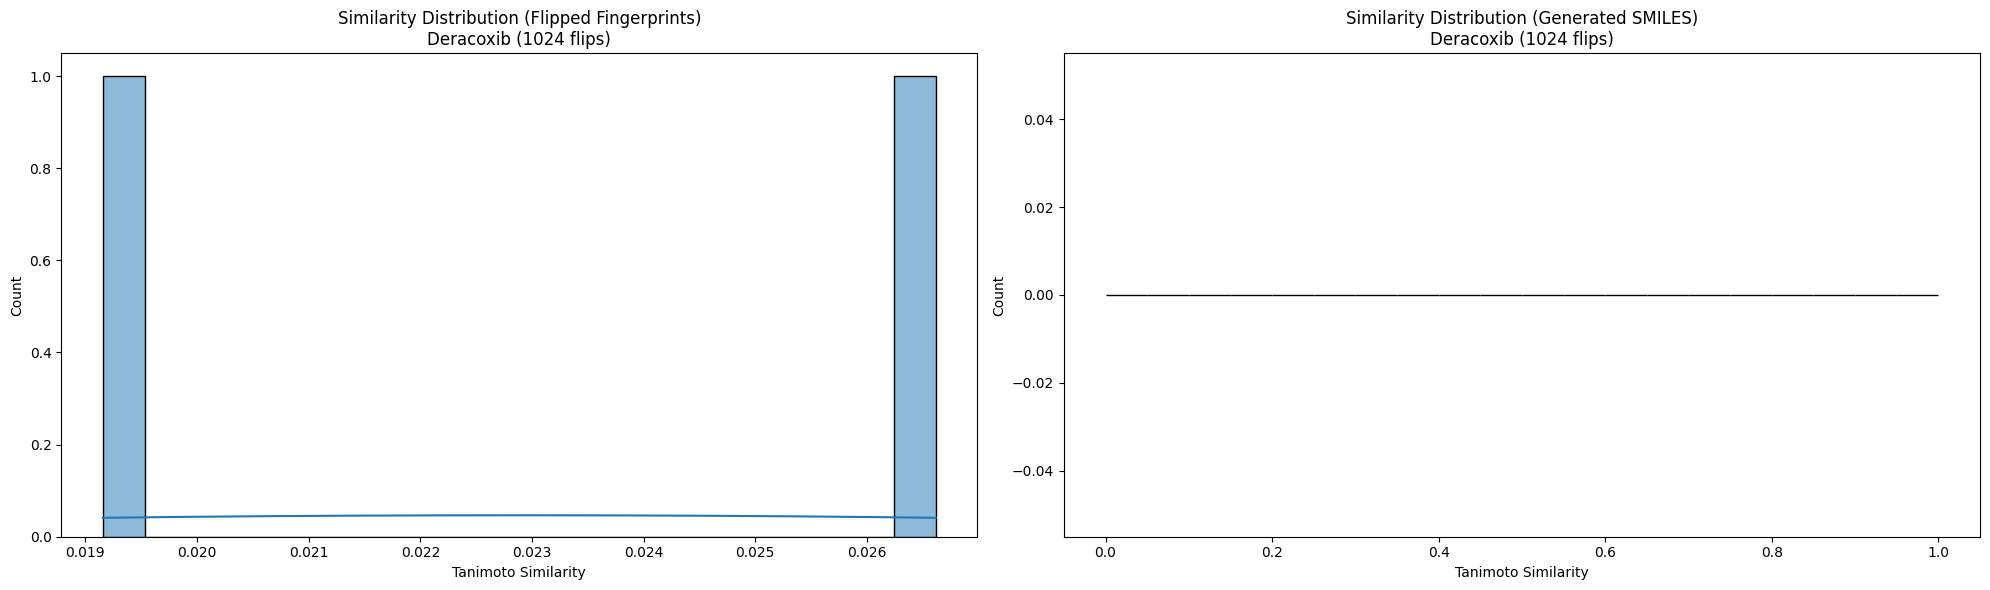

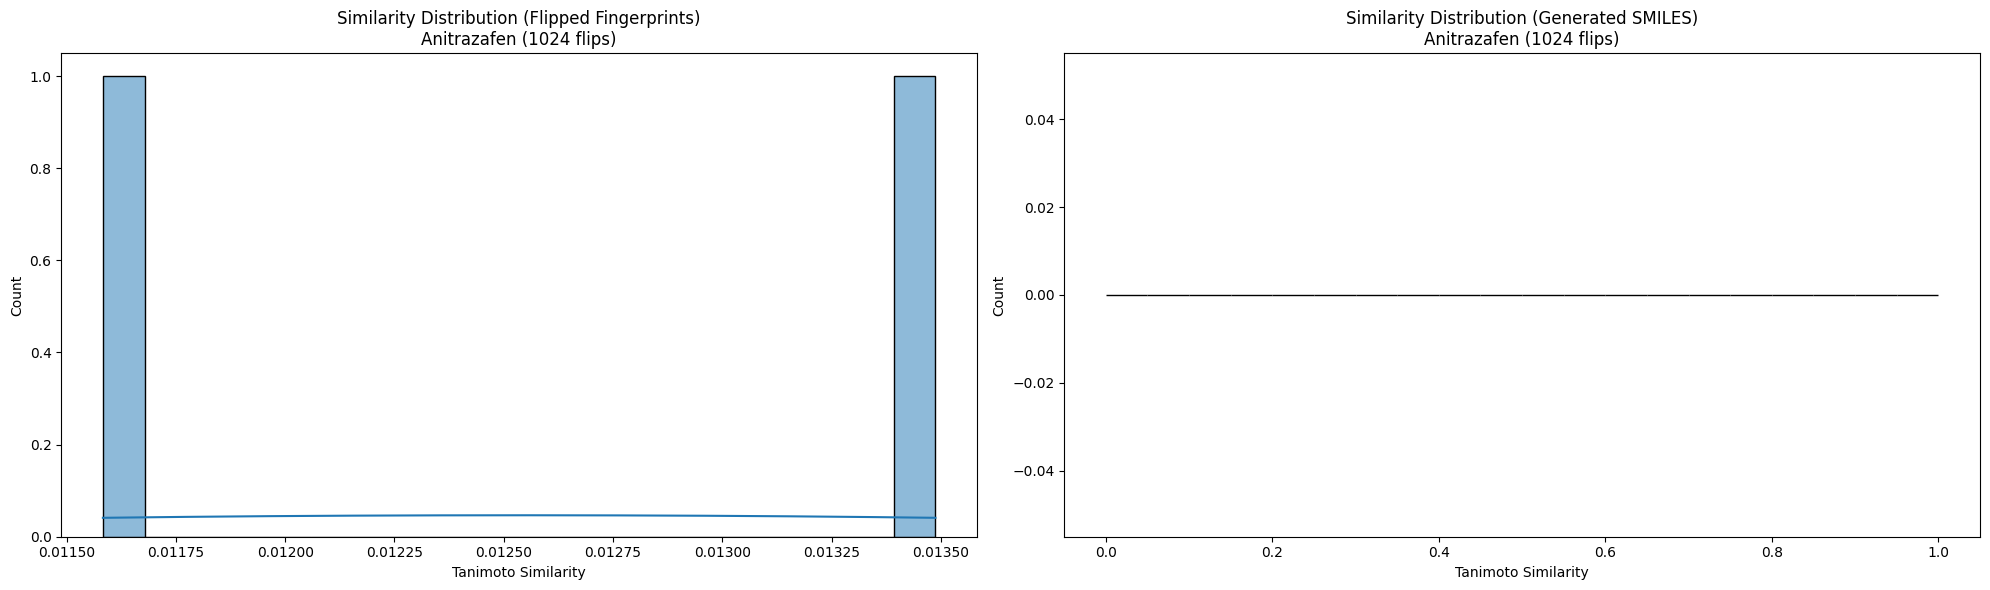

In [31]:
plot_similarity_distribution(parecoxib_df_1024, 'Parecoxib', 1024)
plot_similarity_distribution(celecoxib_df_1024, 'Celecoxib', 1024)
plot_similarity_distribution(cimicoxib_df_1024, 'Cimicoxib', 1024)
plot_similarity_distribution(deracoxib_df_1024, 'Deracoxib', 1024)
plot_similarity_distribution(anitrazafen_df_1024, 'Anitrazafen', 1024)

### Plot generated molecules
***

In [25]:
def mol_to_image(mol):
    if isinstance(mol, str):
        mol = Chem.MolFromSmiles(mol)
    if mol is None:
        return None
    img = Draw.MolToImage(mol)
    buffered = io.BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

def plot_unique_molecules(df, n_flips):
    molecule_name = df.iloc[0]['title'].lower()
    
    # Create a new column in df to store the original index
    df['original_index'] = df.index

    # Remove duplicates based on 'Generated_SMILES' but keep original indices
    df_unique = df.drop_duplicates(subset=['Generated_SMILES']).copy()
    
    n_rows = len(df_unique) + 1  # +1 for the original molecule
    fig, axes = plt.subplots(n_rows, 1, figsize=(10, 5*n_rows))
    
    # Plot original molecule
    original_mol = Chem.MolFromSmiles(df.iloc[0]['SMILES'])
    img = Draw.MolToImage(original_mol)
    axes[0].imshow(img)
    axes[0].set_title(f"Original Molecule: {df.iloc[0]['title']}\nSMILES: {df.iloc[0]['SMILES']}")
    axes[0].axis('off')
    
    # Plot unique generated molecules
    for i, row in enumerate(df_unique.iterrows(), start=1):
        img = mol_to_image(row[1]['Generated_SMILES'])
        if img:
            axes[i].imshow(Image.open(io.BytesIO(base64.b64decode(img))))
            axes[i].set_title(f"Generated Molecule {i} (Flipped Bits: {row[1]['FlippedBitPositions']})\n"
                              f"SMILES: {row[1]['Generated_SMILES']}\n"
                              f"Tanimoto = {row[1].get('Tanimoto', 'N/A'):.2f}\n"
                              f"Original Index: {row[1]['original_index']}")
        else:
            axes[i].text(0.5, 0.5, "Invalid SMILES", ha='center', va='center')
        axes[i].axis('off')

    plt.tight_layout()
    plt.savefig(os.path.join(INPUT_DIR, f'{molecule_name}_{n_flips}_unique_flips.png'))
    plt.close(fig)


In [26]:
plot_unique_molecules(parecoxib_df_2,2)
plot_unique_molecules(celecoxib_df_2,2)
plot_unique_molecules(cimicoxib_df_2,2)
plot_unique_molecules(deracoxib_df_2,2)
plot_unique_molecules(anitrazafen_df_2,2)

plot_unique_molecules(parecoxib_df_4,4)
plot_unique_molecules(celecoxib_df_4,4)
plot_unique_molecules(cimicoxib_df_4,4)
plot_unique_molecules(deracoxib_df_4,4)
plot_unique_molecules(anitrazafen_df_4,4)

plot_unique_molecules(parecoxib_df_8,8)
plot_unique_molecules(celecoxib_df_8,8)
plot_unique_molecules(cimicoxib_df_8,8)
plot_unique_molecules(deracoxib_df_8,8)
plot_unique_molecules(anitrazafen_df_8,8)

plot_unique_molecules(parecoxib_df_128,128)
plot_unique_molecules(celecoxib_df_128,128)
plot_unique_molecules(cimicoxib_df_128,128)
plot_unique_molecules(deracoxib_df_128,128)
plot_unique_molecules(anitrazafen_df_128,128)

plot_unique_molecules(parecoxib_df_1024,1024)
plot_unique_molecules(celecoxib_df_1024,1024)
plot_unique_molecules(cimicoxib_df_1024,1024)
plot_unique_molecules(deracoxib_df_1024,1024)
plot_unique_molecules(anitrazafen_df_1024,1024)


[17:41:36] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:36] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:39] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:39] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:39] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:39] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:41] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:41] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:50] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:50] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:55] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:55] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:55] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:55] SMILES Parse Err

In [32]:
# Create a dictionary to store the data
data = {
    'Compound': [],
    '2_bits': [],
    '4_bits': [],
    '8_bits': [],
    '128_bits': [],
    '1024_bits': []
}

# List of compounds and their corresponding dataframes
compounds = [
    ('Parecoxib', parecoxib_df_2, parecoxib_df_4, parecoxib_df_8, parecoxib_df_128, parecoxib_df_1024),
    ('Celecoxib', celecoxib_df_2, celecoxib_df_4, celecoxib_df_8, celecoxib_df_128, celecoxib_df_1024),
    ('Cimicoxib', cimicoxib_df_2, cimicoxib_df_4, cimicoxib_df_8, cimicoxib_df_128, cimicoxib_df_1024),
    ('Deracoxib', deracoxib_df_2, deracoxib_df_4, deracoxib_df_8, deracoxib_df_128, deracoxib_df_1024),
    ('Anitrazafen', anitrazafen_df_2, anitrazafen_df_4, anitrazafen_df_8, anitrazafen_df_128, anitrazafen_df_1024)
]

# Iterate over each compound and their dataframes
for compound, df_2, df_4, df_8, df_128, df_1024 in compounds:
    data['Compound'].append(compound)
    data['2_bits'].append(df_2[df_2['Generated_SMILES'] != 'Invalid SMILES string']['Generated_SMILES'].nunique())
    data['4_bits'].append(df_4[df_4['Generated_SMILES'] != 'Invalid SMILES string']['Generated_SMILES'].nunique())
    data['8_bits'].append(df_8[df_8['Generated_SMILES'] != 'Invalid SMILES string']['Generated_SMILES'].nunique())
    data['128_bits'].append(df_128[df_128['Generated_SMILES'] != 'Invalid SMILES string']['Generated_SMILES'].nunique())
    data['1024_bits'].append(df_1024[df_1024['Generated_SMILES'] != 'Invalid SMILES string']['Generated_SMILES'].nunique())

# Create the dataframe
unique_valid_smiles_df = pd.DataFrame(data)

# Display the dataframe
unique_valid_smiles_df

,Compound,2_bits,4_bits,8_bits,128_bits,1024_bits
0,Parecoxib,8,11,63,12,0
1,Celecoxib,3,5,52,8,0
2,Cimicoxib,3,4,19,11,1
3,Deracoxib,2,5,39,13,0
4,Anitrazafen,24,61,115,7,0


In [33]:
# Sort DataFrame by Tanimoto similarity in descending order
anitrazafen_df_8_sorted = anitrazafen_df_8.sort_values(by='Tanimoto', ascending=True)

anitrazafen_df_8_sorted.head(10)

,title,SMILES,FingerprintBits,SparseFingerprintBits,FingerprintBitsFlipped,SparseFingerprintBitsFlipped,FlippedBitPositions,Generated_SMILES,Device_Used,Valid_SMILES,Molecule,GeneratedFingerprintBits,GeneratedFingerprintSparse,Tanimoto,Tanimoto2
133,Anitrazafen,COc1ccc(cc1)c2nnc(C)nc2c3ccc(OC)cc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",123 139 269 322 323 357 378 454 471 695 718 781 831 841 896 978 1057 1126 1160 1164 1380 1536 1722 1750 1855 1873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[123, 139, 176, 231, 269, 322, 323, 357, 378, 454, 471, 695, 718, 781, 831, 841, 896, 978, 989, 1126, 1160, 1164, 1380, 1389, 1528, 1536, 1719, 1722, 1750, 1800, 1855, 1873]","[176, 989, 231, 1719, 1057, 1528, 1389, 1800]",COc1ccc(-c2nc(C)nnc2-c2ccc(-c3nnc(OC)nc3-c3ccc(OC)cc3)cc2)cc1,cuda,True,<rdkit.Chem.rdchem.Mol object at 0x000001E14E7E3430>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",123 139 269 322 323 357 378 454 471 548 695 718 781 831 841 896 978 1057 1126 1160 1164 1356 1380 1412 1415 1536 1722 1750 1855 1873 2012,0.757576,0.838710
230,Anitrazafen,COc1ccc(cc1)c2nnc(C)nc2c3ccc(OC)cc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",123 139 269 322 323 357 378 454 471 695 718 781 831 841 896 978 1057 1126 1160 1164 1380 1536 1722 1750 1855 1873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[112, 123, 139, 141, 258, 269, 322, 323, 357, 378, 454, 471, 695, 718, 774, 781, 831, 841, 896, 978, 1057, 1126, 1164, 1213, 1380, 1536, 1722, 1750, 1760, 1855, 1873, 1901]","[141, 774, 258, 112, 1213, 1160, 1760, 1901]",COc1ccc(-c2nc(C)nnc2-c2nnc(C)nc2-c2ccc(OC)cc2)cc1,cuda,True,<rdkit.Chem.rdchem.Mol object at 0x000001E14E7E75F0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",123 269 322 323 357 378 454 471 695 718 781 831 841 896 978 1057 1126 1160 1164 1184 1380 1536 1722 1750 1855 1873,0.757576,0.925926
32,Anitrazafen,COc1ccc(cc1)c2nnc(C)nc2c3ccc(OC)cc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",123 139 269 322 323 357 378 454 471 695 718 781 831 841 896 978 1057 1126 1160 1164 1380 1536 1722 1750 1855 1873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Plot the nearest neighbors
***

In [29]:
def calculate_fingerprint_similarity_matrix(original_bits, generated_bits):
    """Calculate similarity matrix comparing original and generated fingerprint bits."""
    all_bits = [original_bits] + generated_bits
    n = len(all_bits)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            # Convert bit strings to numpy arrays for comparison
            bits_i = np.array([int(b) for b in all_bits[i]])
            bits_j = np.array([int(b) for b in all_bits[j]])
            
            # Calculate Tanimoto similarity directly from bit vectors
            intersection = np.sum(np.logical_and(bits_i, bits_j))
            union = np.sum(np.logical_or(bits_i, bits_j))
            similarity_matrix[i, j] = intersection / union if union > 0 else 0
            
    return similarity_matrix

def plot_mds_similarity(df, title_column='title', n_flips=10):
    """Plot MDS similarity using original and generated fingerprint bits."""
    if df.empty:
        print(f"Warning: Empty DataFrame for {title_column}")
        return
        
    try:
        # Store original index
        if 'original_index' not in df.columns:
            df['original_index'] = df.index

        # Get original and generated fingerprint bits
        original_bits = df['FingerprintBits'].iloc[0]
        generated_bits = df['GeneratedFingerprintBits'].tolist()
        
        if not generated_bits:
            print(f"Warning: No generated bits found for {df[title_column].iloc[0]}")
            return
            
        # Calculate similarity matrix
        similarity_matrix = calculate_fingerprint_similarity_matrix(original_bits, generated_bits)

        # Apply MDS
        mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
        coords = mds.fit_transform(1 - similarity_matrix)

        # Calculate similarities to original fingerprint
        similarities_to_original = similarity_matrix[0, 1:]

        # Create plot
        plt.figure(figsize=(14, 10))
        
        # Plot generated fingerprints
        scatter = plt.scatter(coords[1:, 0], coords[1:, 1], 
                            c=similarities_to_original, 
                            cmap='viridis', 
                            alpha=0.6, 
                            s=100,
                            label='Generated')
        
        # Plot original fingerprint
        plt.scatter(coords[0, 0], coords[0, 1], 
                   c='red', 
                   s=200, 
                   label='Original', 
                   edgecolors='black')

        # Add color bar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Tanimoto Similarity to Original', rotation=270, labelpad=20)

        # Add labels
        for i in range(len(coords)):
            label = "Original" if i == 0 else f"{df['original_index'].iloc[i-1]}"
            plt.annotate(label, 
                        (coords[i, 0], coords[i, 1]), 
                        xytext=(5, 5),
                        textcoords='offset points', 
                        fontsize=8)

        plt.title(f"2D Projection of Generated Fingerprint Similarity for {df[title_column].iloc[0]} ({n_flips} flips)")
        plt.xlabel("MDS Dimension 1")
        plt.ylabel("MDS Dimension 2")
        plt.legend()
        plt.tight_layout()
        
        filename = f'{df[title_column].iloc[0].lower()}_{n_flips}_flips_mds_generated_similarity.png'
        plt.savefig(os.path.join(INPUT_DIR, filename))
        plt.close()
        
        return True
        
    except Exception as e:
        print(f"Error processing {df[title_column].iloc[0] if not df.empty else 'unknown'}: {str(e)}")
        plt.close()
        return False

def process_and_plot(df, n_flips):
    """Process dataframe and generate plot with error handling."""
    try:
        success = plot_mds_similarity(df, n_flips=n_flips)
        if success:
            print(f"MDS plot saved for {df['title'].iloc[0]} with {n_flips} flips.")
        else:
            print(f"Failed to create MDS plot for data with {n_flips} flips.")
    except Exception as e:
        print(f"Error in process_and_plot with {n_flips} flips: {str(e)}")

In [30]:
process_and_plot(parecoxib_df_2,2)
process_and_plot(celecoxib_df_2,2)
process_and_plot(cimicoxib_df_2,2)
process_and_plot(deracoxib_df_2,2)
process_and_plot(anitrazafen_df_2,2)

process_and_plot(parecoxib_df_4,4)
process_and_plot(celecoxib_df_4,4)
process_and_plot(cimicoxib_df_4,4)
process_and_plot(deracoxib_df_4,4)
process_and_plot(anitrazafen_df_4,4)

process_and_plot(parecoxib_df_8,8)
process_and_plot(celecoxib_df_8,8)
process_and_plot(cimicoxib_df_8,8)
process_and_plot(deracoxib_df_8,8)
process_and_plot(anitrazafen_df_8,8)

process_and_plot(parecoxib_df_128,128)
process_and_plot(celecoxib_df_128,128)
process_and_plot(cimicoxib_df_128,128)
process_and_plot(deracoxib_df_128,128)
process_and_plot(anitrazafen_df_128,128)

process_and_plot(parecoxib_df_1024,1024)
process_and_plot(celecoxib_df_1024,1024)
process_and_plot(cimicoxib_df_1024,1024)
process_and_plot(deracoxib_df_1024,1024)
process_and_plot(anitrazafen_df_1024,1024)

MDS plot saved for Parecoxib with 2 flips.
MDS plot saved for Celecoxib with 2 flips.
MDS plot saved for Cimicoxib with 2 flips.
MDS plot saved for Deracoxib with 2 flips.
MDS plot saved for Anitrazafen with 2 flips.
MDS plot saved for Parecoxib with 4 flips.
MDS plot saved for Celecoxib with 4 flips.
MDS plot saved for Cimicoxib with 4 flips.
MDS plot saved for Deracoxib with 4 flips.
MDS plot saved for Anitrazafen with 4 flips.
MDS plot saved for Parecoxib with 8 flips.
MDS plot saved for Celecoxib with 8 flips.
MDS plot saved for Cimicoxib with 8 flips.
MDS plot saved for Deracoxib with 8 flips.
MDS plot saved for Anitrazafen with 8 flips.
MDS plot saved for Parecoxib with 128 flips.
MDS plot saved for Celecoxib with 128 flips.
MDS plot saved for Cimicoxib with 128 flips.
MDS plot saved for Deracoxib with 128 flips.
MDS plot saved for Anitrazafen with 128 flips.
MDS plot saved for Parecoxib with 1024 flips.
MDS plot saved for Celecoxib with 1024 flips.
MDS plot saved for Cimicoxib w

In [31]:
def plot_tsne_similarity(df, title_column='title', n_flips=10):
    """Plot t-SNE similarity using original and generated fingerprint bits."""
    if df.empty:
        print(f"Warning: Empty DataFrame for {title_column}")
        return False
        
    try:
        # Store original index
        if 'original_index' not in df.columns:
            df['original_index'] = df.index

        # Get original and generated fingerprint bits
        original_bits = df['FingerprintBits'].iloc[0]
        generated_bits = df['GeneratedFingerprintBits'].tolist()
        
        if not generated_bits:
            print(f"Warning: No generated bits found for {df[title_column].iloc[0]}")
            return False
            
        # Calculate similarity matrix
        similarity_matrix = calculate_fingerprint_similarity_matrix(original_bits, generated_bits)

        # Adjust perplexity based on number of samples
        n_samples = len(generated_bits) + 1  # +1 for original
        perplexity = min(30, max(5, n_samples - 1))
        
        # Apply t-SNE
        try:
            tsne = TSNE(n_components=2, 
                       metric='precomputed', 
                       random_state=42,
                       perplexity=perplexity, 
                       init='random', 
                       learning_rate='auto')
            coords = tsne.fit_transform(1 - similarity_matrix)
        except ValueError as e:
            print(f"t-SNE error for {df[title_column].iloc[0]}: {str(e)}")
            return False

        # Calculate similarities to original fingerprint
        similarities_to_original = similarity_matrix[0, 1:]

        # Create plot
        plt.figure(figsize=(14, 10))
        
        # Plot generated fingerprints
        scatter = plt.scatter(coords[1:, 0], coords[1:, 1], 
                            c=similarities_to_original, 
                            cmap='viridis', 
                            alpha=0.6, 
                            s=100,
                            label='Generated')
        
        # Plot original fingerprint
        plt.scatter(coords[0, 0], coords[0, 1], 
                   c='red', 
                   s=200, 
                   label='Original', 
                   edgecolors='black')

        # Add color bar and labels
        cbar = plt.colorbar(scatter)
        cbar.set_label('Tanimoto Similarity to Original', rotation=270, labelpad=20)

        for i in range(len(coords)):
            label = "Original" if i == 0 else f"{df['original_index'].iloc[i-1]}"
            plt.annotate(label, 
                        (coords[i, 0], coords[i, 1]), 
                        xytext=(5, 5),
                        textcoords='offset points', 
                        fontsize=8)

        plt.title(f"2D Projection of Generated Fingerprint Similarity for {df[title_column].iloc[0]} ({n_flips} flips)")
        plt.xlabel("t-SNE Dimension 1")
        plt.ylabel("t-SNE Dimension 2")
        plt.legend()
        plt.tight_layout()
        
        filename = f'{df[title_column].iloc[0].lower()}_{n_flips}_flips_tsne_generated_similarity.png'
        plt.savefig(os.path.join(INPUT_DIR, filename))
        plt.close()
        
        return True
        
    except Exception as e:
        print(f"Error processing {df[title_column].iloc[0] if not df.empty else 'unknown'}: {str(e)}")
        plt.close()
        return False

def process_and_plot_tsne(df, n_flips):
    """Process dataframe and generate t-SNE plot with error handling."""
    try:
        success = plot_tsne_similarity(df, n_flips=n_flips)
        if success:
            print(f"t-SNE plot saved for {df['title'].iloc[0]} with {n_flips} flips.")
        else:
            print(f"Failed to create t-SNE plot for data with {n_flips} flips.")
    except Exception as e:
        print(f"Error in process_and_plot_tsne with {n_flips} flips: {str(e)}")

In [32]:
process_and_plot_tsne(parecoxib_df_2, 2)
process_and_plot_tsne(celecoxib_df_2, 2)
process_and_plot_tsne(cimicoxib_df_2, 2)
process_and_plot_tsne(deracoxib_df_2, 2)
process_and_plot_tsne(anitrazafen_df_2, 2)

process_and_plot_tsne(parecoxib_df_4, 4)
process_and_plot_tsne(celecoxib_df_4, 4)
process_and_plot_tsne(cimicoxib_df_4, 4)
process_and_plot_tsne(deracoxib_df_4, 4)
process_and_plot_tsne(anitrazafen_df_4, 4)

process_and_plot_tsne(parecoxib_df_8, 8)
process_and_plot_tsne(celecoxib_df_8, 8)
process_and_plot_tsne(cimicoxib_df_8, 8)
process_and_plot_tsne(deracoxib_df_8, 8)
process_and_plot_tsne(anitrazafen_df_8, 8)

process_and_plot_tsne(parecoxib_df_128, 128)
process_and_plot_tsne(celecoxib_df_128, 128)
process_and_plot_tsne(cimicoxib_df_128, 128)
process_and_plot_tsne(deracoxib_df_128, 128)
process_and_plot_tsne(anitrazafen_df_128, 128)

process_and_plot_tsne(parecoxib_df_1024, 1024)
process_and_plot_tsne(celecoxib_df_1024, 1024)
process_and_plot_tsne(cimicoxib_df_1024, 1024)
process_and_plot_tsne(deracoxib_df_1024, 1024)
process_and_plot_tsne(anitrazafen_df_1024, 1024)

t-SNE plot saved for Parecoxib with 2 flips.
t-SNE plot saved for Celecoxib with 2 flips.
t-SNE plot saved for Cimicoxib with 2 flips.
t-SNE plot saved for Deracoxib with 2 flips.
t-SNE plot saved for Anitrazafen with 2 flips.
t-SNE plot saved for Parecoxib with 4 flips.
t-SNE plot saved for Celecoxib with 4 flips.
t-SNE plot saved for Cimicoxib with 4 flips.
t-SNE plot saved for Deracoxib with 4 flips.
t-SNE plot saved for Anitrazafen with 4 flips.
t-SNE plot saved for Parecoxib with 8 flips.
t-SNE plot saved for Celecoxib with 8 flips.
t-SNE plot saved for Cimicoxib with 8 flips.
t-SNE plot saved for Deracoxib with 8 flips.
t-SNE plot saved for Anitrazafen with 8 flips.
t-SNE plot saved for Parecoxib with 128 flips.
t-SNE plot saved for Celecoxib with 128 flips.
t-SNE plot saved for Cimicoxib with 128 flips.
t-SNE plot saved for Deracoxib with 128 flips.
t-SNE plot saved for Anitrazafen with 128 flips.
t-SNE error for Parecoxib: perplexity must be less than n_samples
Failed to create

### Bit Analysis
---

In [34]:
dataframes_dict = {
    'parecoxib': {
        2: parecoxib_df_2,
        4: parecoxib_df_4,
        8: parecoxib_df_8,
        128: parecoxib_df_128,
        1024: parecoxib_df_1024
    },
    'celecoxib': {
        2: celecoxib_df_2,
        4: celecoxib_df_4,
        8: celecoxib_df_8,
        128: celecoxib_df_128,
        1024: celecoxib_df_1024
    },
    'cimicoxib': {
        2: cimicoxib_df_2,
        4: cimicoxib_df_4,
        8: cimicoxib_df_8,
        128: cimicoxib_df_128,
        1024: cimicoxib_df_1024
    },
    'deracoxib': {
        2: deracoxib_df_2,
        4: deracoxib_df_4,
        8: deracoxib_df_8,
        128: deracoxib_df_128,
        1024: deracoxib_df_1024
    },
    'anitrazafen': {
        2: anitrazafen_df_2,
        4: anitrazafen_df_4,
        8: anitrazafen_df_8,
        128: anitrazafen_df_128,
        1024: anitrazafen_df_1024
    }
}

In [48]:
def analyze_bit_combinations(df, molecule_name, n_flips):
    """
    Analyze similarities for combinations of bit positions and create detailed summary
    """
    combination_analysis = defaultdict(lambda: {
        'similarities': [],
        'count': 0,
        'avg_similarity': 0,
        'std_similarity': 0,
        'min_similarity': 1,
        'max_similarity': 0,
        'molecule': molecule_name,
        'n_flips': n_flips
    })
    
    # Get original molecule for structure analysis
    original_smiles = df['SMILES'].iloc[0]
    mol = Chem.MolFromSmiles(original_smiles)
    info = {}
    # Generate Morgan fingerprint and get bit info
    AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048, bitInfo=info)
    
    # Analyze each combination of bit flips
    for idx, row in df.iterrows():
        # Convert FlippedBitPositions from string to list
        if isinstance(row['FlippedBitPositions'], str):
            bits = eval(row['FlippedBitPositions'])
        else:
            bits = row['FlippedBitPositions']
            
        # Create a tuple of the bit positions for dictionary key
        bits_key = tuple(sorted(bits))
        similarity = row['Tanimoto']
        
        combination_analysis[bits_key]['similarities'].append(similarity)
        combination_analysis[bits_key]['count'] += 1
        combination_analysis[bits_key]['min_similarity'] = min(
            combination_analysis[bits_key]['min_similarity'], 
            similarity
        )
        combination_analysis[bits_key]['max_similarity'] = max(
            combination_analysis[bits_key]['max_similarity'], 
            similarity
        )
        
        # Add structural information for each bit if available
        structural_info = {}
        for bit in bits:
            if bit in info:
                structural_info[bit] = info[bit]
        if structural_info:
            combination_analysis[bits_key]['substructures'] = structural_info
    
    # Calculate statistics
    for bits, data in combination_analysis.items():
        similarities = data['similarities']
        data['avg_similarity'] = np.mean(similarities)
        data['std_similarity'] = np.std(similarities) if len(similarities) > 1 else 0
    
    return combination_analysis

def analyze_single_molecule(dataframes_dict, molecule_name, n_flips):
    """
    Detailed analysis of a single molecule's fingerprint bit combinations
    """
    df = dataframes_dict[molecule_name.lower()][n_flips]
    analysis = analyze_bit_combinations(df, molecule_name, n_flips)
    
    # Get original molecule
    original_smiles = df['SMILES'].iloc[0]
    mol = Chem.MolFromSmiles(original_smiles)
    
    # Calculate Morgan fingerprint and get bit info
    info = {}
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048, bitInfo=info)
    
    # Sort combinations by impact
    sorted_combinations = sorted(
        analysis.items(), 
        key=lambda x: x[1]['avg_similarity']
    )[:10]  # Get top 10 most impactful combinations
    
    # Display molecule information
    print(f"Analysis for {molecule_name} ({n_flips} flips):")
    print(f"SMILES: {original_smiles}\n")
    display(Draw.MolToImage(mol))
    print("\nTop 10 Most Impactful Bit Combinations:")
    
    # Separate combinations with and without structural information
    combinations_with_info = []
    combinations_without_info = []
    
    for bits, data in sorted_combinations:
        if 'substructures' in data:
            combinations_with_info.append((bits, data))
        else:
            combinations_without_info.append((bits, data))
    
    # Display combinations with structural information
    if combinations_with_info:
        print("\nCombinations with structural information:")
        for bits, data in combinations_with_info:
            print(f"\nBit Combination {bits}:")
            print(f"Tanimoto Similarity: {data['avg_similarity']:.4f}")
            print(f"Times Flipped: {data['count']}")
            # Display substructures for each bit in the combination
            for bit, substructure in data['substructures'].items():
                print(f"\nSubstructure for bit {bit}:")
                display(Draw.DrawMorganBit(mol, bit, info))
    
    # Display combinations without structural information
    if combinations_without_info:
        print("\nCombinations without structural information:")
        for bits, data in combinations_without_info:
            print(f"Bits {bits} (Tanimoto: {data['avg_similarity']:.4f}, Count: {data['count']})")

Analysis for anitrazafen (2 flips):
SMILES: COc1ccc(cc1)c2nnc(C)nc2c3ccc(OC)cc3



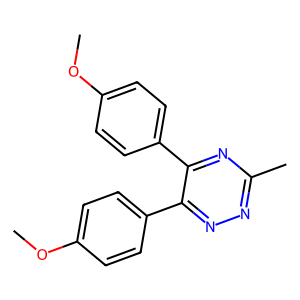


Top 10 Most Impactful Bit Combinations:

Combinations with structural information:

Bit Combination (724, 1380):
Tanimoto Similarity: 0.9259
Times Flipped: 1

Substructure for bit 1380:


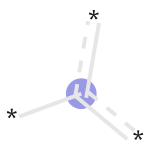


Bit Combination (322, 689):
Tanimoto Similarity: 0.9259
Times Flipped: 1

Substructure for bit 322:


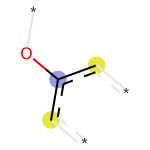


Bit Combination (479, 978):
Tanimoto Similarity: 0.9259
Times Flipped: 1

Substructure for bit 978:


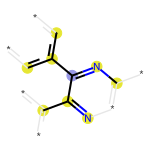


Bit Combination (1160, 1903):
Tanimoto Similarity: 0.9259
Times Flipped: 1

Substructure for bit 1160:


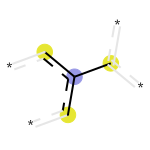


Bit Combination (378, 457):
Tanimoto Similarity: 0.9259
Times Flipped: 1

Substructure for bit 378:


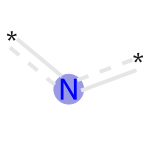


Bit Combination (323, 331):
Tanimoto Similarity: 0.9259
Times Flipped: 1

Substructure for bit 323:


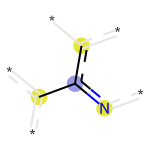


Bit Combination (1481, 1722):
Tanimoto Similarity: 0.9259
Times Flipped: 1

Substructure for bit 1722:


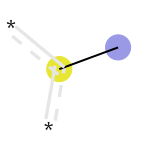


Bit Combination (454, 650):
Tanimoto Similarity: 0.9259
Times Flipped: 1

Substructure for bit 454:


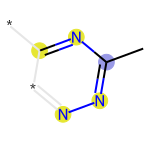


Bit Combination (139, 714):
Tanimoto Similarity: 0.9259
Times Flipped: 1

Substructure for bit 139:


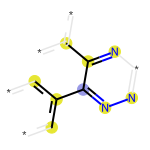


Bit Combination (1126, 1613):
Tanimoto Similarity: 0.9259
Times Flipped: 1

Substructure for bit 1126:


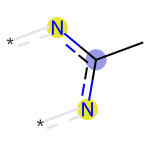



Analysis for anitrazafen (4 flips):
SMILES: COc1ccc(cc1)c2nnc(C)nc2c3ccc(OC)cc3



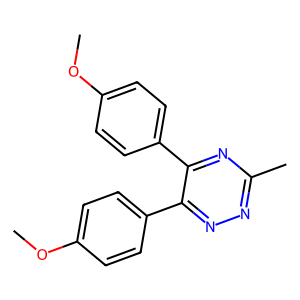


Top 10 Most Impactful Bit Combinations:

Combinations with structural information:

Bit Combination (123, 323, 842, 1421):
Tanimoto Similarity: 0.8571
Times Flipped: 1

Substructure for bit 123:


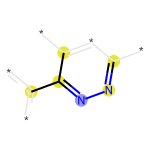


Substructure for bit 323:


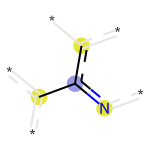


Bit Combination (322, 668, 1248, 1943):
Tanimoto Similarity: 0.8621
Times Flipped: 1

Substructure for bit 322:


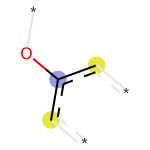


Bit Combination (199, 896, 1416, 1620):
Tanimoto Similarity: 0.8621
Times Flipped: 1

Substructure for bit 896:


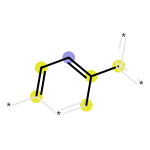


Bit Combination (464, 718, 913, 2030):
Tanimoto Similarity: 0.8621
Times Flipped: 1

Substructure for bit 718:


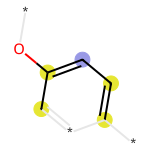


Bit Combination (462, 604, 1781, 1855):
Tanimoto Similarity: 0.8621
Times Flipped: 1

Substructure for bit 1855:


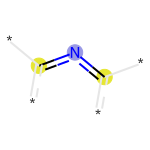


Bit Combination (471, 537, 558, 1220):
Tanimoto Similarity: 0.8621
Times Flipped: 1

Substructure for bit 471:


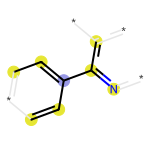


Bit Combination (1057, 1332, 1621, 1891):
Tanimoto Similarity: 0.8621
Times Flipped: 1

Substructure for bit 1057:


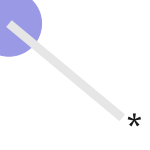


Bit Combination (978, 1348, 1465, 1869):
Tanimoto Similarity: 0.8621
Times Flipped: 1

Substructure for bit 978:


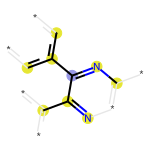


Bit Combination (44, 1244, 1536, 1775):
Tanimoto Similarity: 0.8621
Times Flipped: 1

Substructure for bit 1536:


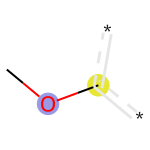


Bit Combination (378, 1124, 1946, 2026):
Tanimoto Similarity: 0.8621
Times Flipped: 1

Substructure for bit 378:


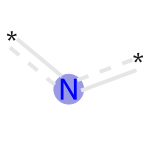



Analysis for anitrazafen (8 flips):
SMILES: COc1ccc(cc1)c2nnc(C)nc2c3ccc(OC)cc3



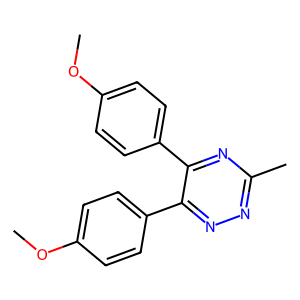


Top 10 Most Impactful Bit Combinations:

Combinations with structural information:

Bit Combination (269, 364, 1000, 1086, 1452, 1881, 1928, 1958):
Tanimoto Similarity: 0.7576
Times Flipped: 1

Substructure for bit 269:


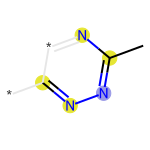


Bit Combination (312, 718, 845, 895, 917, 1028, 1098, 1885):
Tanimoto Similarity: 0.7576
Times Flipped: 1

Substructure for bit 718:


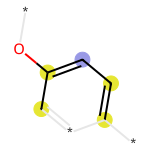


Bit Combination (30, 139, 187, 502, 1202, 1948, 2000, 2028):
Tanimoto Similarity: 0.7576
Times Flipped: 1

Substructure for bit 139:


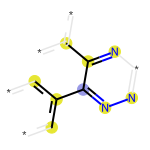


Bit Combination (261, 954, 999, 1126, 1601, 1696, 1778, 1917):
Tanimoto Similarity: 0.7576
Times Flipped: 1

Substructure for bit 1126:


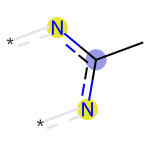


Bit Combination (15, 454, 906, 1305, 1350, 1391, 1496, 1951):
Tanimoto Similarity: 0.7576
Times Flipped: 1

Substructure for bit 454:


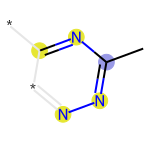


Bit Combination (948, 1356, 1505, 1654, 1679, 1737, 1772, 1855):
Tanimoto Similarity: 0.7576
Times Flipped: 1

Substructure for bit 1855:


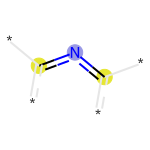


Bit Combination (189, 743, 851, 1465, 1873, 1906, 1916, 1930):
Tanimoto Similarity: 0.7576
Times Flipped: 1

Substructure for bit 1873:


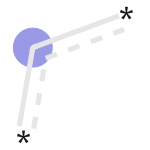


Bit Combination (13, 809, 862, 978, 1282, 1360, 1732, 1742):
Tanimoto Similarity: 0.7576
Times Flipped: 1

Substructure for bit 978:


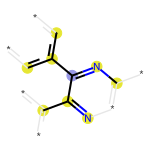


Bit Combination (149, 781, 1069, 1256, 1569, 1619, 1809, 1813):
Tanimoto Similarity: 0.7576
Times Flipped: 1

Substructure for bit 781:


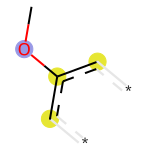


Bit Combination (458, 475, 773, 896, 918, 1480, 1727, 2012):
Tanimoto Similarity: 0.7576
Times Flipped: 1

Substructure for bit 896:


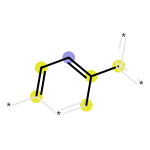

In [49]:
for molecule in ['anitrazafen']:
    for flip_count in [2, 4, 8]:
        analyze_single_molecule(dataframes_dict, molecule, flip_count)
        print("\n" + "="*50 + "\n")